# DataCamp - Data Scientist Career Track (Python)

##     Unsupervised Learning in Python              


In [4]:
# data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Unsupervised Learning in Python/"
data_folder = "/Users/miguelbaptista/Library/CloudStorage/OneDrive-Personal/Data_Science/Python/MOOC/DataCamp/ficheiros/DataCamp - Unsupervised Learning in Python/"

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import scale, StandardScaler, Normalizer, normalize
from scipy.stats import pearsonr
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from sklearn.pipeline import make_pipeline

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.manifold import TSNE

from sklearn.decomposition import PCA, TruncatedSVD, NMF


##    CHAPTER 1  - Clustering for dataset exploration


#### Exercício 1 - Unsupervised learning

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]]
[0 0 0 0 0 1 0 0 2 0 1 0 0 2 1]


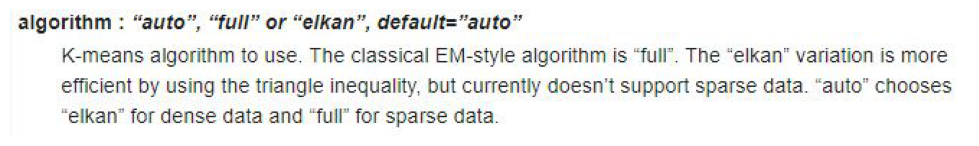

[[6.7 3.1 5.6 2.4]
 [6.9 3.1 5.1 2.3]
 [5.8 2.7 5.1 1.9]
 [6.8 3.2 5.9 2.3]
 [6.7 3.3 5.7 2.5]
 [6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]
[1 1 1 1 1 1 1 1 1 1]


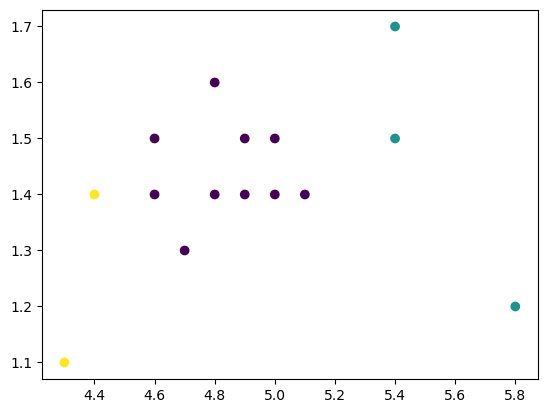

In [9]:
# %%script false
#vídeo

# Unsupervised learning
# ● Unsupervised learning finds patterns in data
# ● E.g. clustering customers by their purchases
# ● Compressing the data using purchase patterns (dimension reduction)

# Supervised vs unsupervised learning
# ● Supervised learning finds patterns for a prediction task
# ● E.g. classify tumors as benign or cancerous (labels)
# ● Unsupervised learning finds patterns in data
# ● ... but without a specific prediction task in mind

from sklearn.datasets import load_iris

iris = load_iris()
samples = iris.data[:15, :]

# Iris dataset
# - Measurements of many iris plants
# - 3 species of iris: setosa, versicolor, virginica
# - Petal length, petal width, sepal length, sepal width (the features of the dataset)

# Arrays, features & samples
# ● 2D NumPy array
# ● Columns are measurements (the features)
# ● Rows represent iris plants (the samples)

# Iris data is 4-dimensional
# ● Iris samples are points in 4 dimensional space
# ● Dimension = number of features
# ● Dimension too high to visualize!
# ● ... but unsupervised learning gives insight

# --> k-means clustering
#   ● Finds clusters of samples
#   ● Number of clusters must be specified
#   ● Implemented in sklearn ("scikit-learn")

print(samples)

# k-means clustering with scikit-learn
from sklearn.cluster import KMeans    # ----> Geometry (metric used): Euclidean distance between points

model = KMeans(n_clusters=3)  # temos 3 espécies tb (já sabemos de antemão, mas vamos pôr assim)

model.fit(samples)

KMeans(algorithm='auto')  # ver imagem sobre o algoritmo utilizado. ('auto' é o default)
                          # -> o "full" parece ser o normal/clássico, onde depois de inicialmente ter os pontos atribuídos
                          #   aos clusters ou ter os centroids (ver método de 'init'), calcula o 'centroid' (vetor das p 
                          #   médias das variáveis para as observações do cluster K em causa) e atribui iterativamente ao 
                          #   cluster as observações + próximas (distância Euclidiana) e repete até os clusters não se 
                          #   alterarem. (local optimum)
                          # -> o 'auto' é uma combinação do "full" em certos casos e do "elkan" noutros (ver documentação).
    
    # o modo de iniciar o algoritmo é definido em 'init' (‘k-means++’, ‘random’ or an ndarray): 'k-means++' é default, onde
    # seleciona de início os centroids de certa forma (ver 'n_init': 10 default) para acelerar o processo de convergência.
    # ('n_init'): nº de vezes q o KMeans é corrido com centroids diferentes de início, onde ganha a selecção de centroids 
    #  com menor inércia ao fim de n_init corridas.
    # o 'random' é o clássico, onde atribui aleatoriamente às observações o cluster a que pertence. 
    
    # 'inertia_'  --> Sum of squared distances of samples to their closest cluster center.
                                                                        

labels = model.predict(samples)
print(labels) 

imagem = plt.imread(data_folder + "kmeans_algorithms.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.3, right=1.5, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# Cluster labels for new samples
# ● New samples can be assigned to existing clusters
# ● k-means remembers the mean of each cluster (the "centroids")
# ● Finds the nearest centroid to each new sample

new_samples = iris.data[-10:, :]
print(new_samples) 

new_labels = model.predict(new_samples) 

print(new_labels) 

# Scatter plots
# ● Scatter plot of sepal length vs petal length
# ● Each point represents an iris sample
# ● Color points by cluster labels
# ● PyPlot (matplotlib.pyplot)
import matplotlib.pyplot as plt

xs = samples[:,0]   #0 -> sepal length
ys = samples[:,2]   #2 -> petal lenght
plt.scatter(xs, ys, c=labels)
plt.show()


Exercício 2

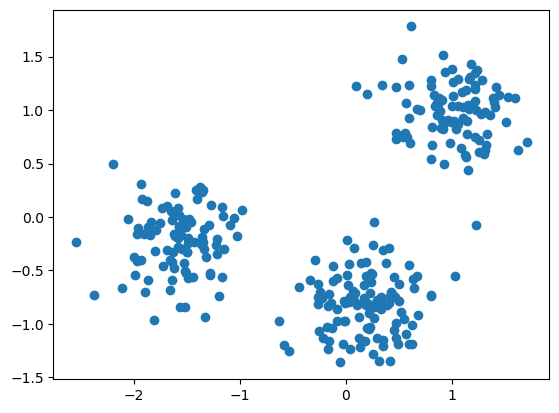

In [11]:
# How many clusters?

# fiz um subset do array dado por eles
points = np.array([[ 0.06544649, -0.76866376],       [-1.52901547, -0.42953079],       [ 1.70993371,  0.69885253],       [ 1.16779145,  1.01262638],       [-1.80110088, -0.31861296],       [-1.63567888, -0.02859535],       [ 1.21990375,  0.74643463],       [-0.26175155, -0.62492939],       [-1.61925804, -0.47983949],       [-1.84329582, -0.16694431],       [ 1.35999602,  0.94995827],       [ 0.42291856, -0.7349534 ],       [-1.68576139,  0.10686728],       [ 0.90629995,  1.09105162],       [-1.56478322, -0.84675394],       [-0.0257849 , -1.18672539],       [ 0.83027324,  1.14504612],       [ 1.22450432,  1.35066759],       [-0.15394596, -0.71704301],       [ 0.86358809,  1.06824613],       [-1.43386366, -0.2381297 ],       [ 0.03844769, -0.74635022],       [-1.58567922,  0.08499354],       [ 0.6359888 , -0.58477698],       [ 0.24417242, -0.53172465],       [-2.19680359,  0.49473677],       [ 1.0323503 , -0.55688   ],       [-0.28858067, -0.39972528],       [ 0.20597008, -0.80171536],       [-1.2107308 , -0.34924109],       [ 1.33423684,  0.7721489 ],       [ 1.19480152,  1.04788556],       [ 0.9917477 ,  0.89202008],       [-1.8356219 , -0.04839732],       [ 0.08415721, -0.71564326],       [-1.48970175, -0.19299604],       [ 0.38782418, -0.82060119],       [-0.01448044, -0.9779841 ],       [-2.0521341 , -0.02129125],       [ 0.10331194, -0.82162781],       [-0.44189315, -0.65710974],       [ 1.10390926,  1.02481182],       [-1.59227759, -0.17374038],       [-1.47344152, -0.02202853],       [-1.35514704,  0.22971067],       [ 0.0412337 , -1.23776622],       [ 0.4761517 , -1.13672124],       [ 1.04335676,  0.82345905],       [-0.07961882, -0.85677394],       [ 0.87065059,  1.08052841],       [ 1.40267313,  1.07525119],       [ 0.80111157,  1.28342825],       [-0.16527516, -1.23583804],       [-0.33779221, -0.59194323],       [ 0.80610749, -0.73752159],       [-1.43590032, -0.56384446],       [ 0.54868895, -0.95143829],       [ 0.46803131, -0.74973907],       [-1.5137129 , -0.83914323],      [ 0.9138436 ,  1.51126532],       [-1.97233903, -0.41155375],       [ 0.5213406 , -0.88654894],      [ 0.62759494, -1.18590477],       [ 0.94163014,  1.35399335],       [ 0.56994768,  1.07036606],      [-1.87663382,  0.14745773],      [ 0.90612186,  0.91084011],       [-1.37481454,  0.28428395],       [-1.80564029, -0.96710574],       [ 0.34307757, -0.79999275],       [ 0.70380566,  1.00025804],       [-1.68489862, -0.30564595],       [ 1.31473221,  0.98614978],       [ 0.26151216, -0.26069251],       [ 0.9193121 ,  0.82371485],       [-1.21795929, -0.20219674],       [-0.17722723, -1.02665245],       [ 0.64824862, -0.66822881],       [ 0.41206786, -0.28783784],       [ 1.01568202,  1.13481667],       [ 0.67900254, -0.91489502],       [-1.05182747, -0.01062376],       [ 0.61306599,  1.78210384],       [-1.50219748, -0.52308922],       [-1.72717293, -0.46173916],       [-1.60995631, -0.1821007 ],       [-1.09111021, -0.0781398 ],       [-0.01046978, -0.80913034],       [ 0.32782303, -0.80734754],       [ 1.22038503,  1.1959793 ],       [-1.33328681, -0.30001937],       [ 0.87959517,  1.11566491],       [-1.14829098, -0.30400762],       [-0.58019755, -1.19996018],       [-0.01161159, -0.78468854],       [ 0.17359724, -0.63398145],       [ 1.32738556,  0.67759969],       [-1.93467327,  0.30572472],       [-1.57761893, -0.27726365],       [ 0.47639   ,  1.21422648],       [-1.65237509, -0.6803981 ],       [-0.12609976, -1.04327457],      [-1.89607082, -0.70085502],       [ 0.57466899,  0.74878369],       [-0.16660312, -0.83110295],       [ 0.8013355 ,  1.22244435],       [ 1.18455426,  1.4346467 ],       [ 1.08864428,  0.64667112],      [-1.61158505,  0.22805725],       [-1.57512205, -0.09612576],      [ 0.0721357 , -0.69640328],       [-1.40054298,  0.16390598],      [ 1.09607713,  1.16804691],       [-2.54346204, -0.23089822],       [-1.34544875,  0.25151126],       [-1.35478629, -0.19103317],       [ 0.18368113, -1.15827725],       [-1.31368677, -0.376357  ],       [ 0.09990129,  1.22500491],       [ 1.17225574,  1.30835143],       [ 0.0865397 , -0.79714371],      [-0.21053923, -1.13421511],       [ 0.26496024, -0.94760742],      [-0.2557591 , -1.06266022],       [-0.26039757, -0.74774225],      [-1.91787359,  0.16434571],       [ 0.93021139,  0.49436331],     [ 0.44770467, -0.72877918],       [-1.63802869, -0.58925528],       [-1.95712763, -0.10125137],      [ 0.9270337 ,  0.88251423],       [ 1.25660093,  0.60828073],       [-1.72818632,  0.08416887],       [ 0.3499788 , -0.30490298],       [-1.51696082, -0.50913109],       [ 0.18763605, -0.55424924],       [ 0.89609809,  0.83551508],       [-1.54968857, -0.17114782],       [ 1.2157457 ,  1.23317728],       [ 0.20307745, -1.03784906],       [ 0.84589086,  1.03615273],       [ 0.53237919,  1.47362884],       [-0.05319044, -1.36150553],       [ 1.38819743,  1.11729915],       [ 1.00696304,  1.0367721 ],       [ 0.56681869, -1.09637176],       [ 0.86888296,  1.05248874],       [-1.16286609, -0.55875245],       [ 0.27717768, -0.83844015],       [ 0.16563267, -0.80306607],       [ 0.38263303, -0.42683241],       [ 1.14519807,  0.89659026],      [ 0.81455857,  0.67533667],       [-1.8603152 , -0.09537561],       [ 0.965641  ,  0.90295579],       [-1.49897451, -0.33254044],       [-0.1335489 , -0.80727582],       [ 0.12541527, -1.13354906],       [ 1.06062436,  1.28816358],       [-1.49154578, -0.2024641 ],       [ 1.16189032,  1.28819877],       [ 0.54282033,  0.75203524],       [ 0.89221065,  0.99211624],      [-1.49932011, -0.32430667],       [ 0.3166647 , -1.34482915],       [ 0.13972469, -1.22097448],       [-1.5499724 , -0.10782584],       [ 1.23846858,  1.37668804],       [ 1.25558954,  0.72026098],       [ 0.25558689, -1.28529763],       [ 0.45168933, -0.55952093],       [ 1.06202057,  1.03404604],       [ 0.67451908, -0.54970299],       [ 0.22759676, -1.02729468],       [-1.45835281, -0.04951074],       [ 0.23273501, -0.70849262],       [ 1.59679589,  1.11395076],     [ 0.80476105,  0.544627  ],      [ 1.15492521,  1.04352191],       [ 0.59632776, -1.19142897],       [ 0.02839068, -0.43829366],       [ 1.13451584,  0.5632633 ],       [ 0.21576204, -1.04445753],      [ 1.41048987,  1.02830719],       [ 1.12289302,  0.58029441],       [ 0.25200688, -0.82588436],       [-1.28566081, -0.07390909],       [ 1.52849815,  1.11822469],      [-0.23907858, -0.70541972],       [-0.25792784, -0.81825035],      [ 0.59367818, -0.45239915],       [ 0.07931909, -0.29233213],       [-1.27256815,  0.11630577],      [ 0.66930129,  1.00731481],       [ 0.34791546, -1.20822877],      [-2.11283993, -0.66897935],      [-1.6293824 , -0.32718222],       [-1.53819139, -0.01501972],       [-0.11988545, -0.6036339 ],     [-1.54418956, -0.30389844],      [ 0.30026614, -0.77723173],      [ 0.00935449, -0.53888192],       [-1.33424393, -0.11560431],       [ 0.47504489,  0.78421384],       [ 0.59313264,  1.232239  ],       [ 0.41370369, -1.35205857],       [ 0.55840948,  0.78831053],      [ 0.49855018, -0.789949  ],       [ 0.35675809, -0.81038693],      [-1.86197825, -0.59071305],       [-1.61977671, -0.16076687],       [ 0.80779295, -0.73311294],       [ 1.62745775,  0.62787163],       [-1.56993593, -0.08467567],       [ 1.02558561,  0.89383302],       [ 0.24293461, -0.6088253 ],       [ 1.23130242,  1.00262186],       [-1.9651013 , -0.15886289],       [ 0.42795032, -0.70384432],      [-1.58306818, -0.19431923],       [-1.57195922,  0.01413469],       [-0.98145373,  0.06132285],       [-1.48637844, -0.5746531 ],       [ 0.98745828,  0.69188053],       [ 1.28619721,  1.28128821],       [ 0.85850596,  0.95541481],       [ 0.19028286, -0.82112942],       [ 0.26561046, -0.04255239],       [-1.61897897,  0.00862372],       [ 0.24070183, -0.52664209],       [ 1.15220993,  0.43916694],       [-1.21967812, -0.2580313 ],       [ 0.33412533, -0.86117761],       [ 0.17131003, -0.75638965],       [-1.19828397, -0.73744665],       [-0.12245932, -0.45648879],       [ 1.51200698,  0.88825741],       [ 1.10338866,  0.92347479],       [ 1.30972095,  0.59066989],       [ 0.19964876,  1.14855889],       [ 0.81460515,  0.84538972],       [-1.6422739 , -0.42296206],       [ 0.01224351, -0.21247816],       [ 0.33709102, -0.74618065],       [ 0.47301054,  0.72712075],       [ 0.34706626,  1.23033757],       [-0.00393279, -0.97209694],       [-1.64303119,  0.05276337],       [ 1.44649625,  1.14217033],       [-1.93030087, -0.40026146],       [-2.37296135, -0.72633645],       [ 0.45860122, -1.06048953],       [ 0.4896361 , -1.18928313],       [-1.02335902, -0.17520578],       [-1.32761107, -0.93963549],       [-1.50987909, -0.09473658],      [ 0.02723057, -0.79870549],       [ 1.0169412 ,  1.26461701],       [ 0.47733527, -0.9898471 ],       [-1.27784224, -0.547416  ],       [ 0.49898802, -0.6237259 ],       [ 1.06004731,  0.86870008],       [ 1.00207501,  1.38293512],       [ 1.31161394,  0.62833956],       [ 1.13428443,  1.18346542],       [ 1.27671346,  0.96632878],       [-0.63342885, -0.97768251],       [ 0.12698779, -0.93142317],       [-1.34510812, -0.23754226],       [-0.53162278, -1.25153594],       [ 0.21959934, -0.90269938],       [-1.78997479, -0.12115748],       [ 1.23197473, -0.07453764],       [ 1.4163536 ,  1.21551752],      [-1.90280976, -0.1638976 ],       [-0.22440081, -0.75454248],       [ 0.59559412,  0.92414553],       [ 1.21930773,  1.08175284],       [-1.99427535, -0.37587799],       [-1.27818474, -0.52454551],       [ 0.62352689, -1.01430108],       [ 0.14024251, -0.428266  ],       [-0.16145713, -1.16359731],       [-1.74795865, -0.06033101],       [-1.16659791,  0.0902393 ],       [ 0.41110408, -0.8084249 ],       [ 1.14757168,  0.77804528],       [-1.65590748, -0.40105446],       [-1.15306865,  0.00858699],       [ 0.60892121,  0.68974833],       [-0.08434138, -0.97615256],       [ 0.19170053, -0.42331438],       [ 0.29663162, -1.13357399],       [-1.36893628, -0.25052124],       [-0.08037807, -0.56784155],       [ 0.35695011, -1.15064408],       [ 0.02482179, -0.63594828],       [-1.49075558, -0.2482507 ],       [-1.408588  ,  0.25635431],       [-1.98274626, -0.54584475]])

xs = points[:, 0]   
ys = points[:, 1]

plt.scatter(xs, ys)
plt.show()

# How many clusters you see?
# Answer: 3

Exercício 3

In [13]:
# Clustering 2D points

points
new_points = np.array([[  4.00233332e-01,  -1.26544471e+00],       [  8.03230370e-01,   1.28260167e+00],       [ -1.39507552e+00,   5.57292921e-02],       [ -3.41192677e-01,  -1.07661994e+00],       [  1.54781747e+00,   1.40250049e+00],       [  2.45032018e-01,  -4.83442328e-01],       [  1.20706886e+00,   8.88752605e-01],       [  1.25132628e+00,   1.15555395e+00],       [  1.81004415e+00,   9.65530731e-01],       [ -1.66963401e+00,  -3.08103509e-01],       [ -7.17482105e-02,  -9.37939700e-01],       [  6.82631927e-01,   1.10258160e+00],       [  1.09039598e+00,   1.43899529e+00],       [ -1.67645414e+00,  -5.04557049e-01],       [ -1.84447804e+00,   4.52539544e-02],       [  1.24234851e+00,   1.02088661e+00],       [ -1.86147041e+00,   6.38645811e-03],       [ -1.46044943e+00,   1.53252383e-01],       [  4.98981817e-01,   8.98006058e-01],       [  9.83962244e-01,   1.04369375e+00],       [ -1.83136742e+00,  -1.63632835e-01],       [  1.30622617e+00,   1.07658717e+00],       [  3.53420328e-01,  -7.51320218e-01],       [  1.13957970e+00,   1.54503860e+00],       [  2.93995694e-01,  -1.26135005e+00],       [ -1.14558225e+00,  -3.78709636e-02],       [  1.18716105e+00,   6.00240663e-01],       [ -2.23211946e+00,   2.30475094e-01],       [ -1.28320430e+00,  -3.93314568e-01],       [  4.94296696e-01,  -8.83972009e-01],       [  6.31834930e-02,  -9.11952228e-01],       [  9.35759539e-01,   8.66820685e-01],       [  1.58014721e+00,   1.03788392e+00],       [  1.06304960e+00,   1.02706082e+00],       [ -1.39732536e+00,  -5.05162249e-01],       [ -1.09935240e-01,  -9.08113619e-01],       [  1.17346758e+00,   9.47501092e-01],       [  9.20084511e-01,   1.45767672e+00],       [  5.82658956e-01,  -9.00086832e-01],       [  9.52772328e-01,   8.99042386e-01],       [ -1.37266956e+00,  -3.17878215e-02],       [  2.12706760e-02,  -7.07614194e-01],       [  3.27049052e-01,  -5.55998107e-01],       [ -1.71590267e+00,   2.15222266e-01],       [  5.12516209e-01,  -7.60128245e-01],       [  1.13023469e+00,   7.22451122e-01],       [ -1.43074310e+00,  -3.42787511e-01],       [ -1.82724625e+00,   1.17657775e-01],       [  1.41801350e+00,   1.11455080e+00],       [  1.26897304e+00,   1.41925971e+00],       [  8.04076494e-01,   1.63988557e+00],       [  8.34567752e-01,   1.09956689e+00],       [ -1.24714732e+00,  -2.23522320e-01],       [ -1.29422537e+00,   8.18770024e-02],       [ -2.27378316e-01,  -4.13331387e-01],       [  2.18830387e-01,  -4.68183120e-01],       [ -1.22593414e+00,   2.55599147e-01],       [ -1.31294033e+00,  -4.28892070e-01],       [ -1.33532382e+00,   6.52053776e-01],       [ -3.01100233e-01,  -1.25156451e+00],       [  2.02778356e-01,  -9.05277445e-01],       [  1.01357784e+00,   1.12378981e+00],       [  8.18324394e-01,   8.60841257e-01],       [  1.26181556e+00,   1.46613744e+00],       [  4.64867724e-01,  -7.97212459e-01],       [  3.60908898e-01,   8.44106720e-01],       [ -2.15098310e+00,  -3.69583937e-01],       [  1.05005281e+00,   8.74181364e-01],       [  1.06580074e-01,  -7.49268153e-01],       [ -1.73945723e+00,   2.52183577e-01],       [ -1.12017687e-01,  -6.52469788e-01],       [  5.16618951e-01,  -6.41267582e-01],       [  3.26621787e-01,  -8.80608015e-01],       [  1.09017759e+00,   1.10952558e+00],       [  3.64459576e-01,  -6.94215622e-01],       [ -1.90779318e+00,   1.87383674e-01],       [ -1.95601829e+00,   1.39959126e-01],       [  3.18541701e-01,  -4.05271704e-01],       [  7.36512699e-01,   1.76416255e+00],       [ -1.44175162e+00,  -5.72320429e-02],       [  3.21757168e-01,  -5.34283821e-01],       [ -1.37317305e+00,   4.64484644e-02],       [  6.87225910e-02,  -1.10522944e+00],       [  9.59314218e-01,   6.52316210e-01],       [ -1.62641919e+00,  -5.62423280e-01],       [  1.06788305e+00,   7.29260482e-01],       [ -1.79643547e+00,  -9.88307418e-01],       [ -9.88628377e-02,  -6.81198092e-02],       [ -1.05135700e-01,   1.17022143e+00],       [  8.79964699e-01,   1.25340317e+00],       [  9.80753407e-01,   1.15486539e+00],       [ -8.33224966e-02,  -9.24844368e-01],       [  8.48759673e-01,   1.09397425e+00],       [  1.32941649e+00,   1.13734563e+00],       [  3.23788068e-01,  -7.49732451e-01],       [ -1.52610970e+00,  -2.49016929e-01],       [ -1.48598116e+00,  -2.68828608e-01],       [ -1.80479553e+00,   1.87052700e-01],       [ -2.01907347e+00,  -4.49511651e-01],       [  2.87202402e-01,  -6.55487415e-01],       [  8.22295102e-01,   1.38443234e+00],       [ -3.56997036e-02,  -8.01825807e-01],       [ -1.66955440e+00,  -1.38258505e-01],       [ -1.78226821e+00,   2.93353033e-01],       [  7.25837138e-01,  -6.23374024e-01],       [  3.88432593e-01,  -7.61283497e-01],       [  1.49002783e+00,   7.95678671e-01],       [  6.55423228e-04,  -7.40580702e-01],       [ -1.34533116e+00,  -4.75629937e-01],       [ -8.03845106e-01,  -3.09943013e-01],       [ -2.49041295e-01,  -1.00662418e+00],       [ -1.41095118e+00,  -7.06744127e-02],       [ -1.75119594e+00,  -3.00491336e-01],       [ -1.27942724e+00,   1.73774600e-01],       [  3.35028183e-01,   6.24761151e-01],       [  1.16819649e+00,   1.18902251e+00],       [  7.15210457e-01,   9.26077419e-01],       [  1.30057278e+00,   9.16349565e-01],       [ -1.21697008e+00,   1.10039477e-01],       [ -1.70707935e+00,  -5.99659536e-02],       [  1.20730655e+00,   1.05480463e+00],       [  1.86896009e-01,  -9.58047234e-01],       [  8.03463471e-01,   3.86133140e-01],       [ -1.73486790e+00,  -1.49831913e-01],       [  1.31261499e+00,   1.11802982e+00],       [  4.04993148e-01,  -5.10900347e-01],       [ -1.93267968e+00,   2.20764694e-01],       [  6.56004799e-01,   9.61887161e-01],       [ -1.40588215e+00,   1.17134403e-01],       [ -1.74306264e+00,  -7.47473959e-02],       [  5.43745412e-01,   1.47209224e+00],       [ -1.97331669e+00,  -2.27124493e-01],       [  1.53901171e+00,   1.36049081e+00],       [ -1.48323452e+00,  -4.90302063e-01],       [  3.86748484e-01,  -1.26173400e+00],       [  1.17015716e+00,   1.18549415e+00],       [ -8.05381721e-02,  -3.21923627e-01],       [ -6.82273156e-02,  -8.52825887e-01],       [  7.13500028e-01,   1.27868520e+00],       [ -1.85014378e+00,  -5.03490558e-01],       [  6.36085266e-02,  -1.41257040e+00],       [  1.52966062e+00,   9.66056572e-01],       [  1.62165714e-01,  -1.37374843e+00],       [ -3.23474497e-01,  -7.06620269e-01],       [ -1.51768993e+00,   1.87658302e-01],       [  8.88895911e-01,   7.62237161e-01],       [  4.83164032e-01,   8.81931869e-01],       [ -5.52997766e-02,  -7.11305016e-01],       [ -1.57966441e+00,  -6.29220313e-01],       [  5.51308645e-02,  -8.47206763e-01],       [ -2.06001582e+00,   5.87697787e-02],       [  1.11810855e+00,   1.30254175e+00],       [  4.87016164e-01,  -9.90143937e-01],       [ -1.65518042e+00,  -1.69386383e-01],       [ -1.44349738e+00,   1.90299243e-01],       [ -1.70074547e-01,  -8.26736022e-01],       [ -1.82433979e+00,  -3.07814626e-01],       [  1.03093485e+00,   1.26457691e+00],       [  1.64431169e+00,   1.27773115e+00],       [ -1.47617693e+00,   2.60783872e-02],       [  1.00953067e+00,   1.14270181e+00],      [ -1.45285636e+00,  -2.55216207e-01],       [ -1.74092917e+00,  -8.34443177e-02],       [  1.22038299e+00,   1.28699961e+00],       [  9.16925397e-01,   7.32070275e-01],       [ -1.60754185e-03,  -7.26375571e-01],       [  8.93841238e-01,   8.41146643e-01],       [  6.33791961e-01,   1.00915134e+00],       [ -1.47927075e+00,  -6.99781936e-01],       [  5.44799374e-02,  -1.06441970e+00],       [ -1.51935568e+00,  -4.89276929e-01],       [  2.89939026e-01,  -7.73145523e-01],       [ -9.68154061e-03,  -1.13302207e+00],       [  1.13474639e+00,   9.71541744e-01],       [  5.36421406e-01,  -8.47906388e-01],       [  1.14759864e+00,   6.89915205e-01],       [  5.73291902e-01,   7.90802710e-01],       [  2.12377397e-01,  -6.07569808e-01],       [  5.26579548e-01,  -8.15930264e-01],       [ -2.01831641e+00,   6.78650740e-02],       [ -2.35512624e-01,  -1.08205132e+00],       [  1.59274780e-01,  -6.00717261e-01],       [  2.28120356e-01,  -1.16003549e+00],       [ -1.53658378e+00,   8.40798808e-02],       [  1.13954609e+00,   6.31782001e-01],       [  1.01119255e+00,   1.04360805e+00],       [ -1.42039867e-01,  -4.81230337e-01],       [ -2.23120182e+00,   8.49162905e-02],       [  1.25554811e-01,  -1.01794793e+00],       [ -1.72493509e+00,  -6.94426177e-01],       [ -1.60434630e+00,   4.45550868e-01],       [  7.37153979e-01,   9.26560744e-01],       [  6.72905271e-01,   1.13366030e+00],       [  1.20066456e+00,   7.26273093e-01],       [  7.58747209e-02,  -9.83378326e-01],       [  1.28783262e+00,   1.18088601e+00],       [  1.06521930e+00,   1.00714746e+00],       [  1.05871698e+00,   1.12956519e+00],       [ -1.12643410e+00,   1.66787744e-01],       [ -1.10157218e+00,  -3.64137806e-01],       [  2.35118217e-01,  -1.39769949e-01],       [  1.13853795e+00,   1.01018519e+00],       [  5.31205654e-01,  -8.81990792e-01],       [  4.33085936e-01,  -7.64059042e-01],       [ -4.48926156e-03,  -1.30548411e+00],       [ -1.76348589e+00,  -4.97430739e-01],       [  1.36485681e+00,   5.83404699e-01],       [  5.66923900e-01,   1.51391963e+00],       [  1.35736826e+00,   6.70915318e-01],       [  1.07173397e+00,   6.11990884e-01],       [  1.00106915e+00,   8.93815326e-01],       [  1.33091007e+00,   8.79773879e-01],       [ -1.79603740e+00,  -3.53883973e-02],       [ -1.27222979e+00,   4.00156642e-01],       [  8.47480603e-01,   1.17032364e+00],       [ -1.50989129e+00,  -7.12318330e-01],       [ -1.24953576e+00,  -5.57859730e-01],       [ -1.27717973e+00,  -5.99350550e-01],       [ -1.81946743e+00,   7.37057673e-01],       [  1.19949867e+00,   1.56969386e+00],       [ -1.25543847e+00,  -2.33892826e-01],       [ -1.63052058e+00,   1.61455865e-01],       [  1.10611305e+00,   7.39698224e-01],       [  6.70193192e-01,   8.70567001e-01],       [  3.69670156e-01,  -6.94645306e-01],       [ -1.26362293e+00,  -6.99249285e-01],       [ -3.66687507e-01,  -1.35310260e+00],       [  2.44032147e-01,  -6.59470793e-01],       [ -1.27679142e+00,  -4.85453412e-01],       [  3.77473612e-02,  -6.99251605e-01],      [ -2.19148539e+00,  -4.91199500e-01],       [ -2.93277777e-01,  -5.89488212e-01],       [ -1.65737397e+00,  -2.98337786e-01],       [  7.36638861e-01,   5.78037057e-01],       [  1.13709081e+00,   1.30119754e+00],       [ -1.44146601e+00,   3.13934680e-02],       [  5.92360708e-01,   1.22545114e+00],       [  6.51719414e-01,   4.92674894e-01],       [  5.94559139e-01,   8.25637315e-01],       [ -1.87900722e+00,  -5.21899626e-01],       [  2.15225041e-01,  -1.28269851e+00],       [  4.99145965e-01,  -6.70268634e-01],       [ -1.82954176e+00,  -3.39269731e-01],       [  7.92721403e-01,   1.33785606e+00],       [  9.54363372e-01,   9.80396626e-01],      [ -1.35359846e+00,   1.03976340e-01],       [  1.05595062e+00,   8.07031927e-01],       [ -1.94311010e+00,  -1.18976964e-01],       [ -1.39604137e+00,  -3.10095976e-01],       [  1.28977624e+00,   1.01753365e+00],       [ -1.59503139e+00,  -5.40574609e-01],       [ -1.41994046e+00,  -3.81032569e-01],       [ -2.35569801e-02,  -1.10133702e+00],       [ -1.26038568e+00,  -6.93273886e-01],       [  9.60215981e-01,  -8.11553694e-01],       [  5.51803308e-01,  -1.01793176e+00],       [  3.70185085e-01,  -1.06885468e+00],       [  8.25529207e-01,   8.77007060e-01],       [ -1.87032595e+00,   2.87507199e-01],       [ -1.56260769e+00,  -1.89196712e-01],       [ -1.26346548e+00,  -7.74725237e-01],       [ -6.33800421e-02,  -7.59400611e-01],       [  8.85298280e-01,   8.85620519e-01],       [ -1.43324686e-01,  -1.16083678e+00],       [ -1.83908725e+00,  -3.26655515e-01],       [  2.74709229e-01,  -1.04546829e+00],      [ -1.45703573e+00,  -2.91842036e-01],       [ -1.59048842e+00,   1.66063031e-01],       [  9.25549284e-01,   7.41406406e-01],       [  1.97245469e-01,  -7.80703225e-01],       [  2.88401697e-01,  -8.32425551e-01],       [  7.24141618e-01,  -7.99149200e-01],       [ -1.62658639e+00,  -1.80005543e-01],       [  5.84481588e-01,   1.13195640e+00],       [  1.02146732e+00,   4.59657799e-01],       [  8.65050554e-01,   9.57714887e-01],       [  3.98717766e-01,  -1.24273147e+00],       [  8.62234892e-01,   1.10955561e+00],       [ -1.35999430e+00,   2.49942654e-02],       [ -1.19178505e+00,  -3.82946323e-02],       [  1.29392424e+00,   1.10320509e+00],       [  1.25679630e+00,  -7.79857582e-01],       [  9.38040302e-02,  -5.53247258e-01],       [ -1.73512175e+00,  -9.76271667e-02],       [  2.23153587e-01,  -9.43474351e-01],       [  4.01989100e-01,  -1.10963051e+00],       [ -1.42244158e+00,   1.81914703e-01],       [  3.92476267e-01,  -8.78426277e-01],       [  1.25181875e+00,   6.93614996e-01],       [  1.77481317e-02,  -7.20304235e-01],       [ -1.87752521e+00,  -2.63870424e-01],       [ -1.58063602e+00,  -5.50456344e-01],       [ -1.59589493e+00,  -1.53932892e-01],       [ -1.01829770e+00,   3.88542370e-02],       [  1.24819659e+00,   6.60041803e-01],       [ -1.25551377e+00,  -2.96172009e-02],       [ -1.41864559e+00,  -3.58230179e-01],       [  5.25758326e-01,   8.70500543e-01],       [  5.55599988e-01,   1.18765072e+00],       [  2.81344439e-02,  -6.99111314e-01]])

# Import KMeansfrom sklearn.cluster import KMeans
from sklearn.cluster import KMeans    # ----> Geometry (metric used): Euclidean distance between points

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)  

# Print cluster labels of new_points
print(labels)   # (no sklearn o cluster começa no 0)



[2 0 1 2 0 2 0 0 0 1 2 0 0 1 1 0 1 1 0 0 1 0 2 0 2 1 0 1 1 2 2 0 0 0 1 2 0
 0 2 0 1 2 2 1 2 0 1 1 0 0 0 0 1 1 2 2 1 1 1 2 2 0 0 0 2 0 1 0 2 1 2 2 2 0
 2 1 1 2 0 1 2 1 2 0 1 0 1 2 0 0 0 2 0 0 2 1 1 1 1 2 0 2 1 1 2 2 0 2 1 1 2
 1 1 1 0 0 0 0 1 1 0 2 0 1 0 2 1 0 1 1 0 1 0 1 2 0 2 2 0 1 2 0 2 2 1 0 0 2
 1 2 1 0 2 1 1 2 1 0 0 1 0 1 1 0 0 2 0 0 1 2 1 2 2 0 2 0 0 2 2 1 2 2 2 1 0
 0 2 1 2 1 1 0 0 0 2 0 0 0 1 1 2 0 2 2 2 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 2 1 2 2 1 2 1 2 1 0 0 1 0 0 0 1 2 2 1 0 0 1 0 1 1 0 1 1 2 1 2 2 2 0 1
 1 1 2 0 2 1 2 1 1 0 2 2 2 1 0 0 0 2 0 1 1 0 2 2 1 2 2 1 2 0 2 1 1 1 1 0 1
 1 0 0 2]


Exercício 4

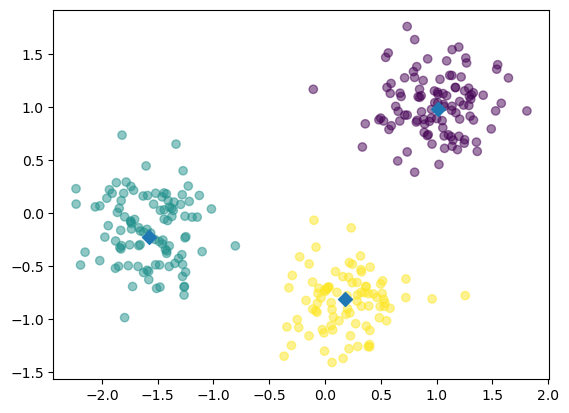

In [15]:
# Inspect your clustering

# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:, 0]
ys = new_points[:, 1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)


# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
# 'D' --> diamond. s=size of the markers

plt.show()


#### Exercício 5 - Evaluating a clustering

   labels  species
0       2        2
1       0        2
2       1        1
3       2        0
4       0        0 

species   0   1   2
labels             
0        19  18  18
1        14  16  20
2        17  16  12 

51.5069980116112


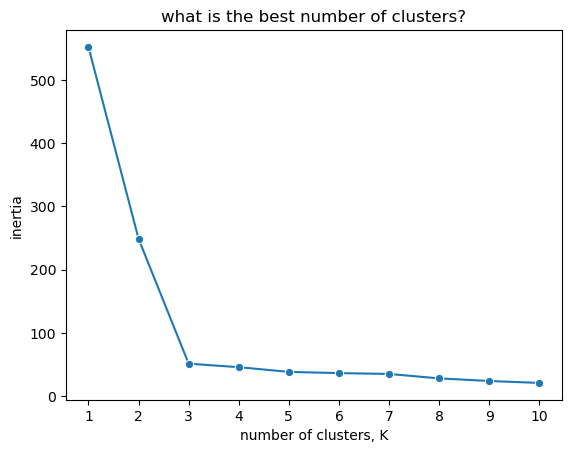

In [17]:
#vídeo

# Evaluating a clustering
# ● Can check correspondence with e.g. iris species
# ● … but what if there are no species to check against?
# ● Measure quality of a clustering
# ● Informs choice of how many clusters to look for

# Iris: clusters vs species
# ● k-means found 3 clusters amongst the iris samples
# ● Do the clusters correspond to the species?

# Cross tabulation with pandas 
# ● Clusters vs species is a "cross-tabulation"
# ● Use the pandas library
# ● Given the species of each sample as a list species

import random
species = iris.target.copy()

random.shuffle(species) # inventei estes
labels = labels[:150]  # inventei estes

# Aligning labels and species
df = pd.DataFrame({'labels': labels, 'species': species})
print(df.head(), "\n")

# Crosstab of labels and species
ct = pd.crosstab(df['labels'], df['species']) 

print(ct, "\n")

###################################################

# How to evaluate a clustering, if there were no species information?

# Measuring clustering quality
#  ● Using only samples and their cluster labels
#  ● A good clustering has tight clusters
#  ● ... and samples in each cluster bunched together


# Inertia measures clustering quality
#  ● Measures how spread out the clusters are (lower is better)
#   --> Distance from each sample to centroid of its cluster
#  ● After fit(), available as attribute 'inertia_'  
#    --> k-means attempts to minimize the inertia when choosing clusters

from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(points)
         
print(model.inertia_)  # 'inertia_'  --> Sum of squared distances of samples to their closest cluster center.

# The number of clusters
# ● Clusterings of the iris dataset with different numbers of clusters
# ● More clusters means lower inertia
# ● What is the best number of clusters? (K)

# How many clusters to choose? (it's a tradeoff)
# ● A good clustering has tight clusters (so low inertia)
# ● ... but not too many clusters!
#  --> Choose an "elbow" in the inertia plot (rule of thumb)
# ● Where inertia begins to decrease more slowly
# ● E.g. for iris dataset, 3 is a good choice

# lineplot: best number of clusters
number_of_clusters = np.arange(1, 11)
inertia = []

for i in number_of_clusters:
    model = KMeans(n_clusters=i)
    model.fit(points)
    inertia.append(model.inertia_)

sns.lineplot(x=number_of_clusters, y=inertia, marker="o")
plt.title("what is the best number of clusters?")
plt.ylabel("inertia")
plt.xlabel("number of clusters, K")
plt.xticks(number_of_clusters)
plt.show()

Exercício 6

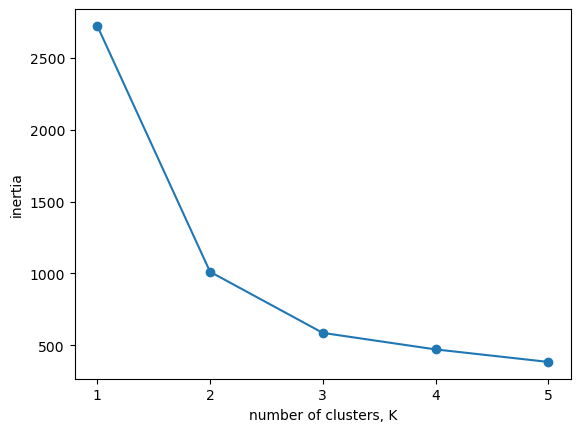

In [19]:
# How many clusters of grain?

samples = np.array(pd.read_csv(data_folder + "seeds.csv", header=None, index_col=-1))

from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, K')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# K=3 seems to be good

Exercício 7

In [21]:
# Evaluating the grain clustering

# In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. 
# In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". 
# In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using 
# a cross-tabulation.

samples
varieties = list(np.array(pd.read_csv(data_folder + "seeds.csv", header=None)
                          .replace([1, 2, 3], ["Kama wheat", "Rosa", "Canadian wheat"]))
                 [:, -1])

#################################################################################################

assert len(samples) == len(varieties)

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
ct


varieties,Canadian wheat,Kama wheat,Rosa
labels,,,
0,0,1,60
1,0,57,10
2,70,12,0


#### Exercício 8 - Transforming features for better clusterings

In [23]:
#vídeo

# Piedmont wines dataset
# ● 178 samples from 3 distinct varieties of red wine: Barolo, Grignolino and Barbera
# ● Features measure chemical composition e.g. alcohol content
# ● … also visual properties like “color intensity”

df_wine = pd.read_csv(data_folder + "wine.csv").drop(['class_label', 'class_name'], axis=1)

samples = df_wine.copy()
varieties = list(np.array(pd.read_csv(data_folder + "wine.csv", index_col=0)
                          .replace([1, 2, 3], ["Barbera", "Grignolino", "Barolo"]))
                 [:, 0])

####################################################################

# Clustering the wines
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
labels = model.fit_predict(df_wine)

# Clusters vs. varieties --> cross tabulation with pandas
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties']) 
print(ct)


# Feature variances
# ● The wine features have very different variances!
# ● Variance of a feature measures spread of its values
print("\nfeatures variance (need to normalize):\n", samples.var(), "\n")   # needs scaling

df_wine.head()

varieties  Barbera  Barolo  Grignolino
labels                                
0               19       0          50
1                0      46           1
2               29      13          20

features variance (need to normalize):
 alcohol                     0.659062
malic_acid                  1.248015
ash                         0.075265
alcalinity_of_ash          11.152686
magnesium                 203.989335
total_phenols               0.391690
flavanoids                  0.997719
nonflavanoid_phenols        0.015489
proanthocyanins             0.327595
color_intensity             5.374449
hue                         0.052245
od280                       0.504086
proline                 99166.717355
dtype: float64 



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [24]:
####################################################################

# StandardScaler
# In kmeans: feature variance = feature influence
# ● StandardScaler transforms each feature to have mean 0 and variance 1
# ● Features are said to be "standardized"

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
samples_scaled = pd.DataFrame(scaler.fit_transform(samples.astype(float)), columns=samples.columns)

# Similar methods
# ● StandardScaler and KMeans have similar methods
# ● Use fit() / transform() with StandardScaler
# ● Use fit() / predict() with KMeans

# StandardScaler, then KMeans
# ● Need to perform two steps: StandardScaler, then (and only then) KMeans
# ● Use sklearn pipeline to combine multiple steps
# ● Data flows from one step into the next

####################################################################

# Pipelines combine multiple steps
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
samples_float = samples.astype(float)

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(scaler, kmeans)    # OR Pipeline(steps=...)  --> from sklearn.pipeline import Pipeline

pipeline.fit(samples_float)   

labels = pipeline.predict(samples_float)

####################################################################

# Feature standardization improves clustering

df_2 = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct_2 = pd.crosstab(df_2['labels'], df_2['varieties']) 
print(ct_2)


# sklearn preprocessing steps
# ● StandardScaler is a "preprocessing" step
# ● MaxAbsScaler and Normalizer are other examples

samples_scaled.head()

varieties  Barbera  Barolo  Grignolino
labels                                
0               48       0           3
1                0       0          66
2                0      59           2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Exercício 9

In [26]:
# Scaling fish data for clustering

samples = np.array(pd.read_csv(data_folder + "fish.csv", header=None).drop(0, axis=1))

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)


Exercício 10

In [28]:
# Clustering the fish data

# fish measurements
species = list(pd.read_csv(data_folder + "fish.csv", header=None)[0])

# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
ct

# It looks like the fish data separates really well into 4 clusters

species,Bream,Pike,Roach,Smelt
labels,,,,
0,3,0,20,0
1,0,17,0,0
2,31,0,0,0
3,0,0,0,14


Exercício 11

In [30]:
# Clustering stocks using KMeans

# daily price movements from 2010 to 2015, where each row = company, and each column = trading day.
movements = np.array(pd.read_csv(data_folder + "company-stock-movements-2010-2015-incl.csv", index_col=0))

# Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline.
# The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

# Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() 
# standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling 
# to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer   #Normalizer() rescales each sample/row independently of the other.
from sklearn.cluster import KMeans

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

Exercício 12

In [32]:
# Which stocks move together?

# stocks data
companies = list(pd.read_csv(data_folder + "company-stock-movements-2010-2015-incl.csv", index_col=0).index)

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

# how stocks move together

    labels                           companies
39       0                              Pfizer
35       1                            Navistar
15       1                                Ford
59       2                               Yahoo
47       2                            Symantec
14       2                                Dell
17       2                     Google/Alphabet
2        2                              Amazon
44       3                        Schlumberger
8        3                         Caterpillar
53       3                       Valero Energy
10       3                      ConocoPhillips
32       3                                  3M
12       3                             Chevron
13       3                   DuPont de Nemours
57       3                               Exxon
23       3                                 IBM
31       3                           McDonalds
1        4                                 AIG
58       4                               Xerox
3        4   

# CHAPTER 2 - Visualization with hierarchical clustering and t-SNE

#### Exercício 1 - Visualizing hierarchies

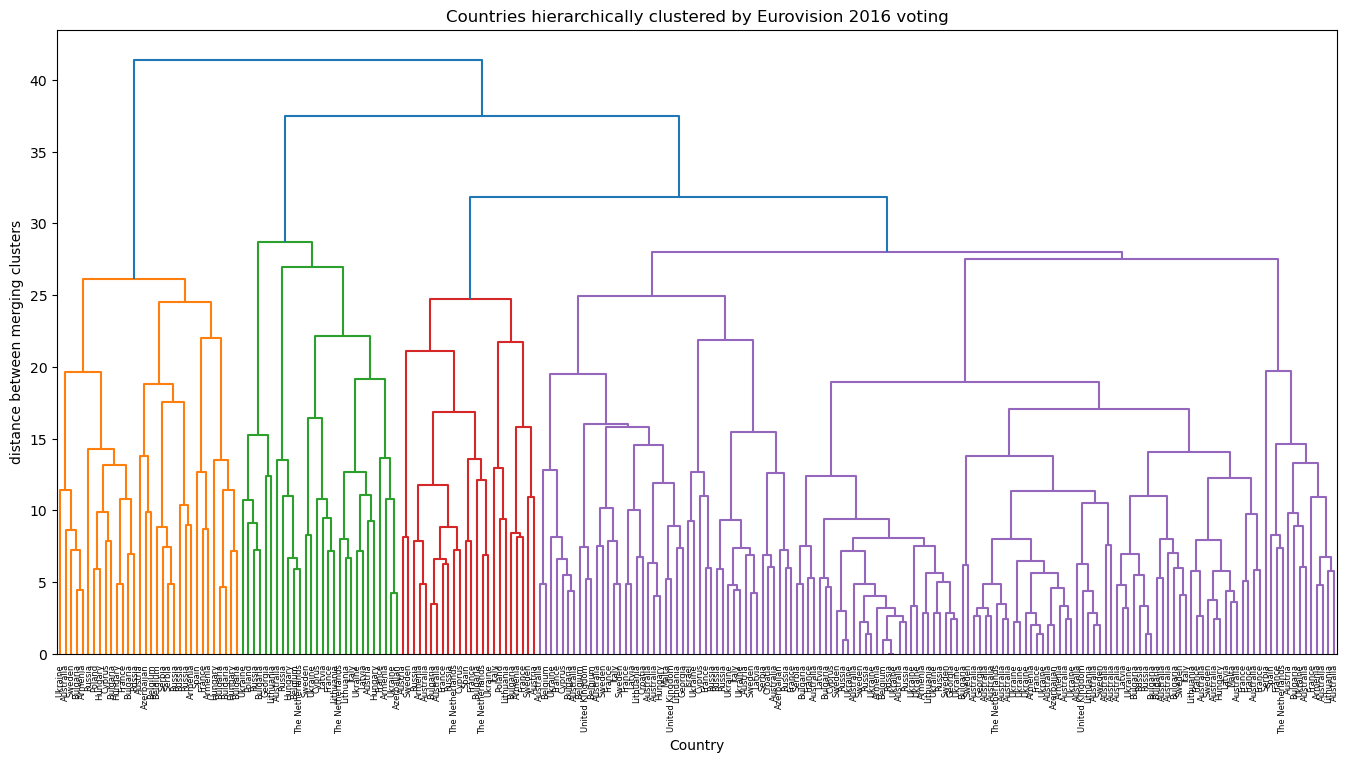

In [35]:
#vídeo

# Visualisations communicate insight
# ● "t-SNE" : Creates a 2D map of a dataset (later)
# ● "Hierarchical clustering" (this video)

# A hierarchy of groups
# ● Groups of living things can form a hierarchy
# ● Clusters are contained in one another

# Eurovision scoring dataset
# ● Countries gave scores to songs performed at the Eurovision 2016
# ● 2D array of scores
# ● Rows are countries, columns are songs

euro_2016 = pd.read_csv(data_folder + "eurovision-2016.csv", index_col=1).drop('From country', axis=1)

# Hierarchical clustering of voting countries

# Hierarchical clustering
# ● Every country begins in a separate cluster
# ● At each step, the two closest clusters are merged
# ● Continue until all countries in a single cluster
# ● This is “agglomerative” hierarchical clustering

# The dendrogram of a hierarchical clustering
# ● Read from the bottom up
# ● Vertical lines represent clusters 

# Dendrograms, step-by-step (ver a interpretação, por exemplo, no livro Introduction to Statistical Learning)

##############################################################################

# Hierarchical clustering with SciPy

# Given samples (the array of scores), and country_names
samples = np.array(euro_2016.dropna())
country_names = list(euro_2016.dropna().index)

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# linkage (choose method)
mergings = linkage(samples, method='complete')

# method='complete': Maximal intercluster dissimilarity. 
#                    Compute all pairwise dissimilarities between the observations (Euclidean distance for example) in 
#                     cluster A and the observations in cluster B, and record the *largest* of these dissimilarities
# method='average' (average); method='single' (smallest)


# dendogram (based on the chosen linkage)
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.subplots_adjust(left=0, bottom=-0.3, right=2, top=1, wspace=0, hspace=0)
plt.title("Countries hierarchically clustered by Eurovision 2016 voting")
plt.xlabel("Country")
plt.ylabel("distance between merging clusters")
plt.show()

Exercício 2

In [37]:
# How many merges?

# If there are 5 data samples, how many merge operations will occur in a hierarchical clustering? 

# Answer: 4

Exercício 3

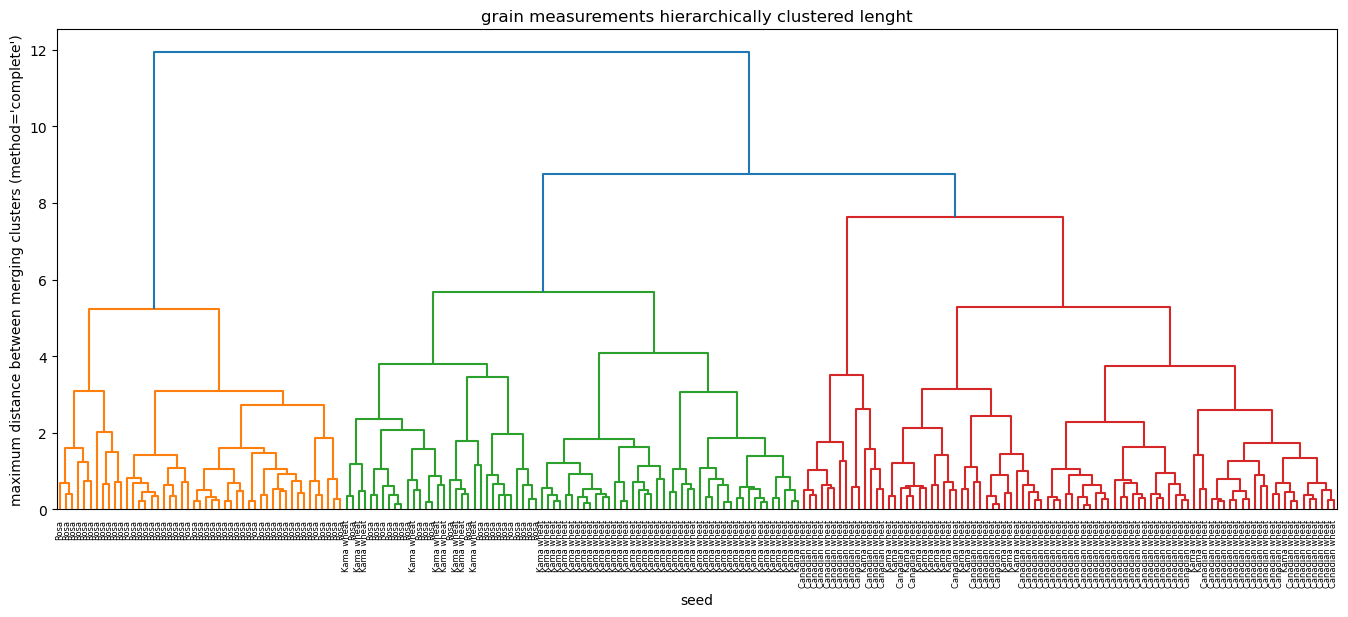

In [39]:
# Hierarchical clustering of the grain data

# grain measurements
samples = np.array(pd.read_csv(data_folder + "seeds.csv", header=None, index_col=-1))
varieties = list(np.array(pd.read_csv(data_folder + "seeds.csv", header=None)
                          .replace([1, 2, 3], ["Kama wheat", "Rosa", "Canadian wheat"]))
                 [:, -1])

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=6)

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0)
plt.title("grain measurements hierarchically clustered lenght")
plt.xlabel("seed")
plt.ylabel("maximum distance between merging clusters (method='complete')")
plt.show()

Exercício 4

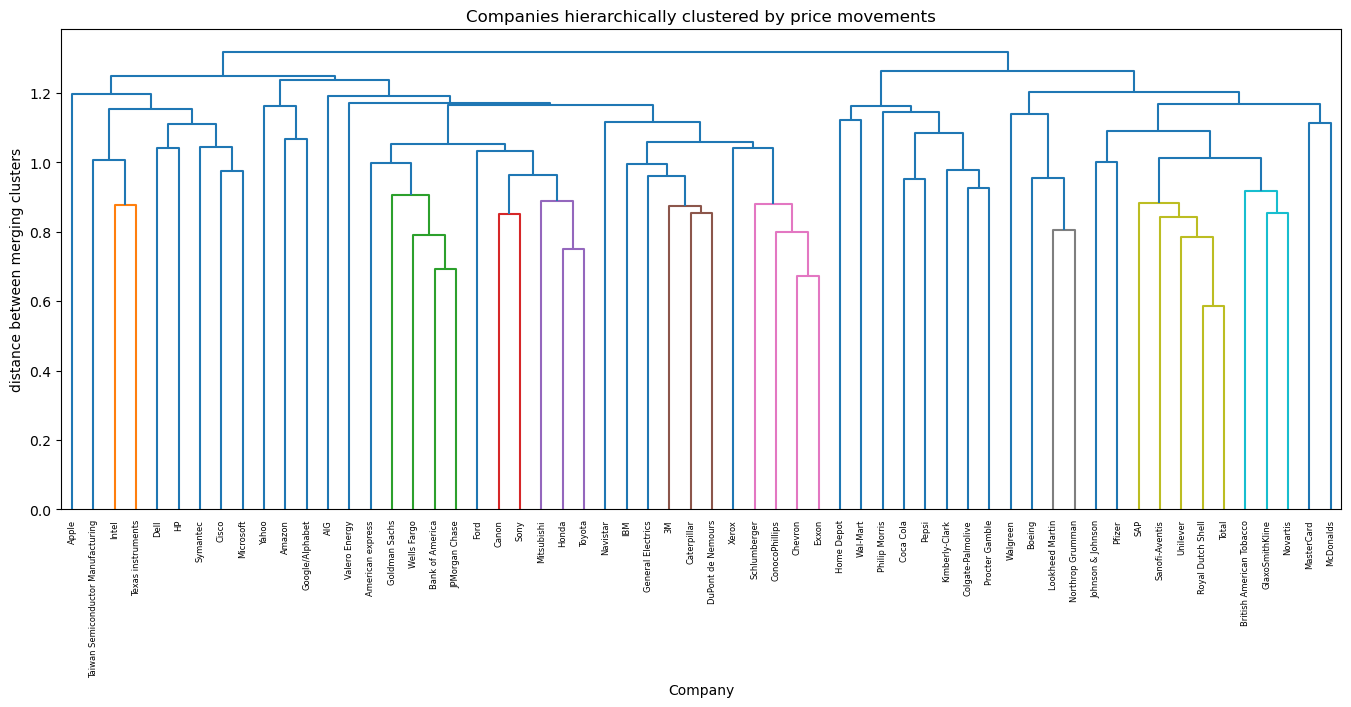

In [41]:
# Hierarchies of stocks

# You'll perform hierarchical clustering of the companies. 
# (NumPy array of price movements movements, where the rows correspond to companies, and a list of the 
# company names companies).

# ---> SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function 
#      from sklearn.preprocessing instead of Normalizer. (from sklearn.preprocessing import normalize)

# stocks data
movements = np.array(pd.read_csv(data_folder + "company-stock-movements-2010-2015-incl.csv", index_col=0))
companies = list(pd.read_csv(data_folder + "company-stock-movements-2010-2015-incl.csv", index_col=0).index)

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0)
plt.title("Companies hierarchically clustered by price movements")
plt.xlabel("Company")
plt.ylabel("distance between merging clusters")
plt.show()


#### Exercício 5 - Cluster labels in hierarchical clustering

In [43]:
#vídeo

# Cluster labels in hierarchical clustering
# ● Not only a visualisation tool
# --> Cluster labels at any intermediate stage can be recovered <---
# --> For use in e.g. cross-tabulations

samples = np.array(euro_2016.dropna())
country_names = list(euro_2016.dropna().index)

# Intermediate clusterings & height on dendrogram
# ● E.g. at height 15: Bulgaria, Cyprus, Greece are one cluster
# ● Russia and Moldova are another
# ● Armenia in a cluster on its own

# Dendrograms show cluster distances
# --> Height on dendrogram = distance between merging clusters
#       ● E.g. clusters with only Cyprus and Greece had distance approximately 6
# ● This new cluster distance approximately 12 from cluster with only Bulgaria 

# Intermediate clusterings & height on dendrogram
# --> Height on dendrogram specifies maximum distance between merging clusters (method='complete')
# ● Don't merge clusters further apart than this (e.g. 15)

# Distance between clusters
# ● Defined by a "linkage method"
# ● Specified via method parameter, e.g. linkage(samples, method="complete")
# ● In "complete" linkage: distance between clusters is max. distance between
# their samples
# ● Different linkage method, different hierarchical clustering

################################################

# Extracting cluster labels (fcluster)
# --> Use the 'fcluster' method
# ● Returns a NumPy array of cluster labels

# Extracting cluster labels using fcluster
from scipy.cluster.hierarchy import linkage
mergings = linkage(samples, method='complete')

from scipy.cluster.hierarchy import fcluster

labels = fcluster(mergings, 15, criterion='distance')

print(labels, "\n======================================================================") 

######################################################

# Aligning cluster labels with country names
pairs = pd.DataFrame({'labels': labels, 'countries': country_names})

print("note that the scipy class label starts at 1, not at 0 like in sklearn!")

pairs.sort_values('labels')[:10] #só pus até ao 10


[ 7 26  2 28 30 29 21  8 30 28 28 28 16 30 17 14 22 26 31 29  5 10 25 30
  2 21 28 28 24 14  7 30 23 28 26 19 16 16 25 29  1 13  3  7 30 30 28 27
 16 29 30 26 29 13 31 29  4  5  2 21 29 28 16 30 29 10 10 20 10 24 31 28
  6 30  2 13 26 25  3 28 30 32 24 29 28 12 16 15 30 23  2 31 26 14 31 31
 30 28 17 23 28 30 30  2 24 24 28 28  8 28 31 11 29 22 29 15 19 29 25  3
 21  1 12 24 21 30 28 30 29  6 17 12 26  9  1 30 31 28 26 28 14  8 29 28
 28 29 30 30 30 27 27 29 29 24 16 28 31 24  7 23 27 28 22 31 18 28  9 13
 19 29 24 28 29 30  1 16 13 28  7 10 28  8 16  4 29  1 29 24  4 29 13 27
 21  2 29 13 30 28 12 30  6 18 29 17 20  4 29  2 29 11 31  5 27  2 23 31
 29 30 24 17 30 25 18 21] 
note that the scipy class label starts at 1, not at 0 like in sklearn!


,labels,countries
121,1,Sweden
134,1,Bulgaria
174,1,Australia
40,1,Ukraine
185,1,Armenia
58,2,Hungary
24,2,Poland
90,2,Russia
74,2,Cyprus
103,2,Hungary


Exercício 6

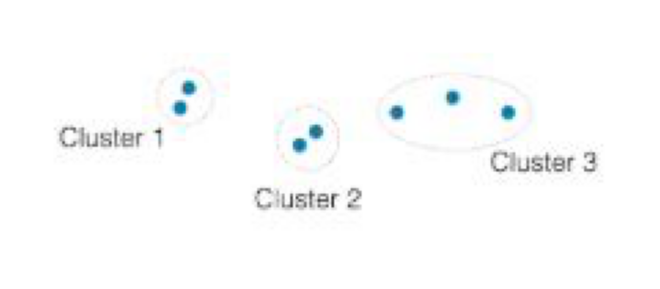

A. In single linkage, cluster 3 is the closest to cluster 2.
B. In complete linkage, cluster 1 is the closest to cluster 2.

Both A and B


In [45]:
# Which clusters are closest?

# In the video, you learned that the linkage method defines how the distance between clusters is measured. 
# In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. 
# In single linkage, the distance between clusters is the distance between the closest points of the clusters.

# Consider the three clusters in the diagram. Which of the following statements are true?

imagem = plt.imread(data_folder + "clusters_example.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

print("A. In single linkage, cluster 3 is the closest to cluster 2.")
print("B. In complete linkage, cluster 1 is the closest to cluster 2.\n")

print("Both A and B")

Exercício 7

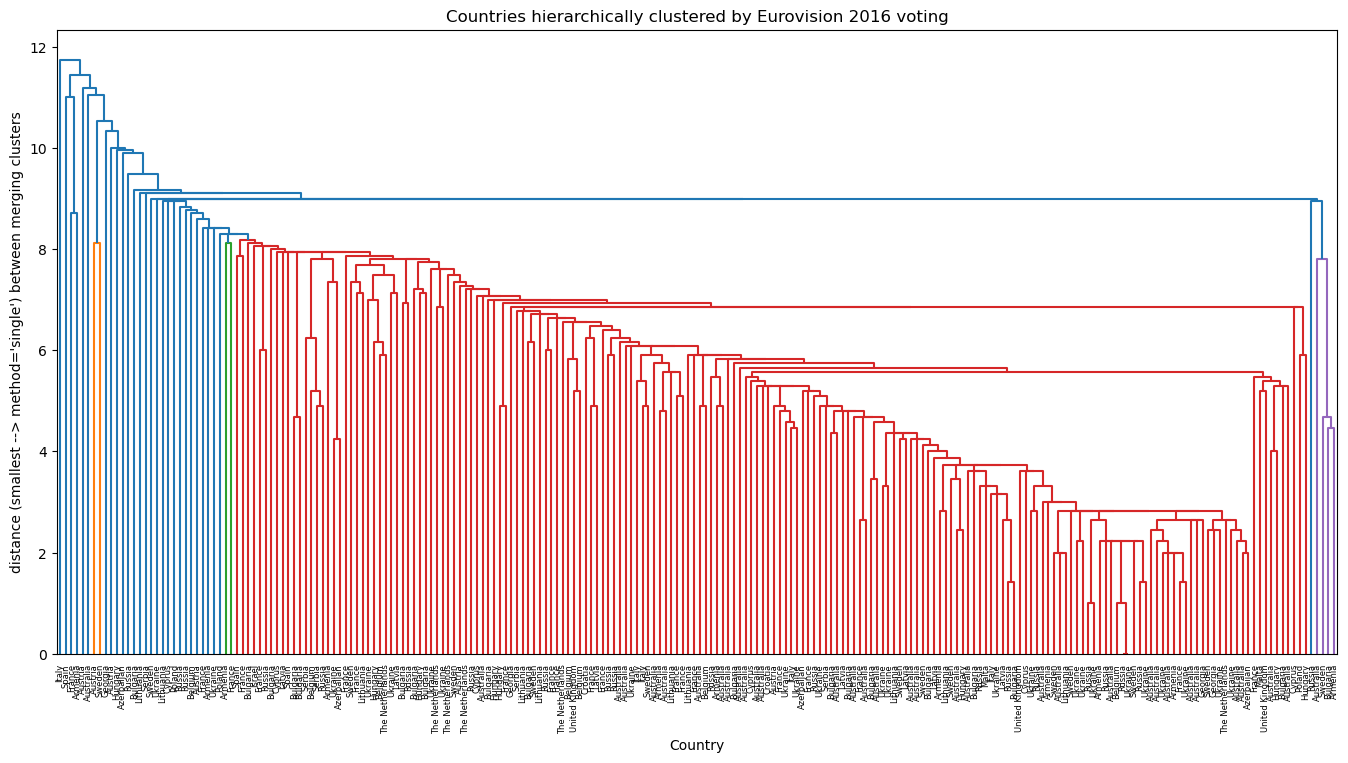

In [47]:
# Different linkage, different hierarchical clustering! (single now)

euro_2016 = pd.read_csv(data_folder + "eurovision-2016.csv", index_col=1).drop('From country', axis=1)

samples = np.array(euro_2016.dropna())
country_names = list(euro_2016.dropna().index)

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)

plt.subplots_adjust(left=0, bottom=-0.3, right=2, top=1, wspace=0, hspace=0)
plt.title("Countries hierarchically clustered by Eurovision 2016 voting")
plt.xlabel("Country")
plt.ylabel("distance (smallest --> method='single') between merging clusters")
plt.show()

Exercício 8

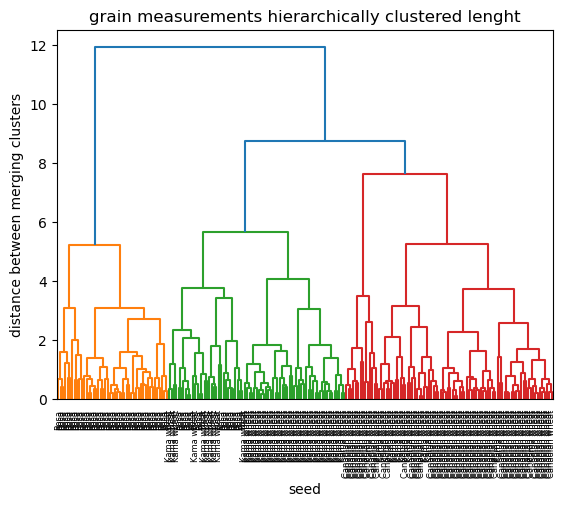

There would be 3 clusters if the hierarchical clustering were stopped at height 8 on the dendrogram.
To compare the cluster labels at this point (intermediate clustering) with the grain varieties, use 'fcluster'


In [49]:
# Intermediate clusterings

# Displayed below is the dendrogram for the hierarchical clustering of the grain samples that you computed earlier. 
# If the hierarchical clustering were stopped at height 6 on the dendrogram, how many clusters would there be?

# grain measurements
samples = np.array(pd.read_csv(data_folder + "seeds.csv", header=None, index_col=-1))
varieties = list(np.array(pd.read_csv(data_folder + "seeds.csv", header=None)
                          .replace([1, 2, 3], ["Kama wheat", "Rosa", "Canadian wheat"]))[:, -1])

mergings = linkage(samples, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=6)

# plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0)
plt.title("grain measurements hierarchically clustered lenght")
plt.xlabel("seed")
plt.ylabel("distance between merging clusters")
plt.show()

print("""There would be 3 clusters if the hierarchical clustering were stopped at height 8 on the dendrogram.
To compare the cluster labels at this point (intermediate clustering) with the grain varieties, use 'fcluster'""")

Exercício 9

In [51]:
# Extracting the cluster labels

# In the previous exercise, you saw that the intermediate clustering of the grain samples at height 8 has 3 clusters. 
# Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels 
#  with the grain varieties using a cross-tabulation.

from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, t=8, criterion='distance')

# t: (float). The threshold to apply when forming flat clusters.
# criterion: (str, optional). ('inconsistent' -> default)
#   distance : Forms flat clusters so that the original observations in each flat cluster have no greater a cophenetic 
#   distance than t.          


# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
ct


varieties,Canadian wheat,Kama wheat,Rosa
labels,,,
1,0,0,47
2,0,52,23
3,70,18,0


#### Exercício 10 - t-SNE (t-distributed stochastic neighbor embedding) visualization of grain dataset

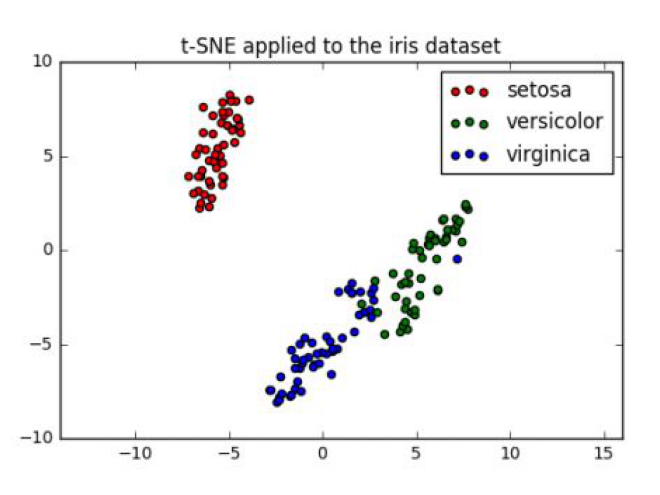

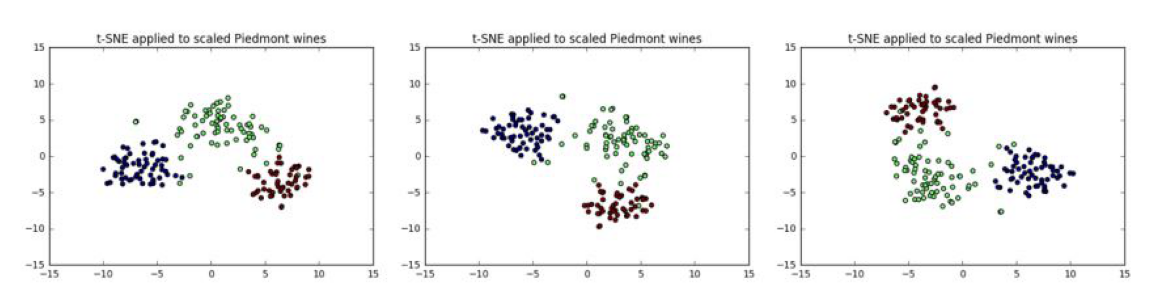

In [53]:
#vídeo

# t-SNE for 2-dimensional maps ---> “t-distributed stochastic neighbor embedding”

# Wikipedia:
#    It is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization 
#    in a low-dimensional space of two or three dimensions.


# ● Maps samples to 2D space (or 3D)
# ● Map approximately preserves nearness of samples
# ● Great for inspecting datasets

# t-SNE on the iris dataset
# ● Iris dataset has 4 measurements, so samples are 4-dimensional
# ● t-SNE maps samples to 2D space
# ● t-SNE didn't know that there were different species
# ● ... yet kept the species mostly separate

imagem = plt.imread(data_folder + "t-SNE.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# Interpreting t-SNE scatter plots
# ● “versicolor” and “virginica” harder to distinguish from one another
# --->  Consistent with k-means inertia plot: could argue for 2 clusters, or for 3

# t-SNE in sklearn
# ● 2D NumPy array samples
# ● List species giving species of labels as number (0, 1, or 2)

# t-SNE in sklearn
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)   #learning_rate: 

transformed = model.fit_transform(samples) #fit_transform: only has a fit_transform

xs = transformed[:,0]
ys = transformed[:,1]
# plt.scatter(xs, ys, c=species)
# plt.show()

####################################################################

# --->t-SNE has only fit_transform()
#       ● Only has a fit_transform() method
#       ● Simultaneously fits the model and transforms the data
#       ● Has no separate fit() or transform() methods
#       ● Can’t extend the map to include new data samples
#        ● Must start over each time!

# t-SNE learning rate
# ● Choose learning rate for the dataset
# ● Wrong choice: points bunch together
# --> Try values between 50 and 200  # 

# Different every time
# ● t-SNE features are different every time
# ● Piedmont wines, 3 runs, 3 different scatter plots!
# ● … however: The wine varieties (=colors) have same position relative to one another

imagem = plt.imread(data_folder + "t-SNE_wine.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.3, right=1.8, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()


Exercício 11

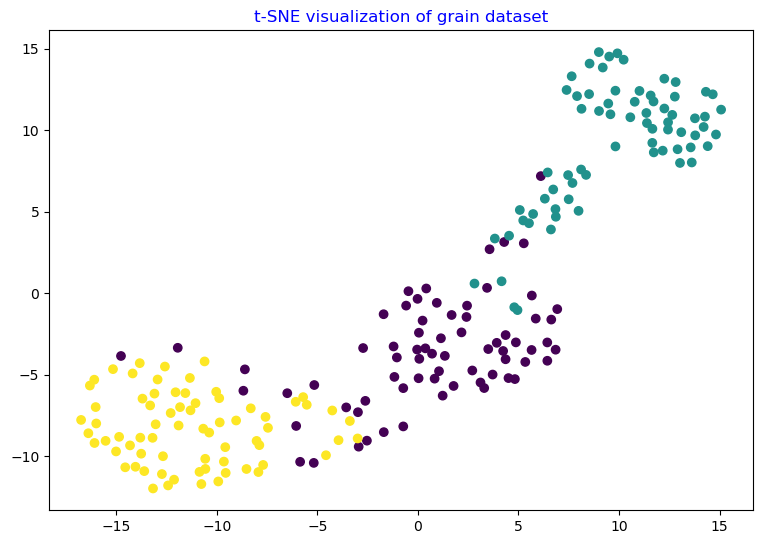

In [55]:
# t-SNE visualization of grain dataset

# grain measurements
samples = np.array(pd.read_csv(data_folder + "seeds.csv", header=None, index_col=-1))
variety_numbers = list(pd.read_csv(data_folder + "seeds.csv", header=None)[7])  # variety number of each grain sample

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.title("t-SNE visualization of grain dataset", color='blue')
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=0, hspace=0)
plt.show()


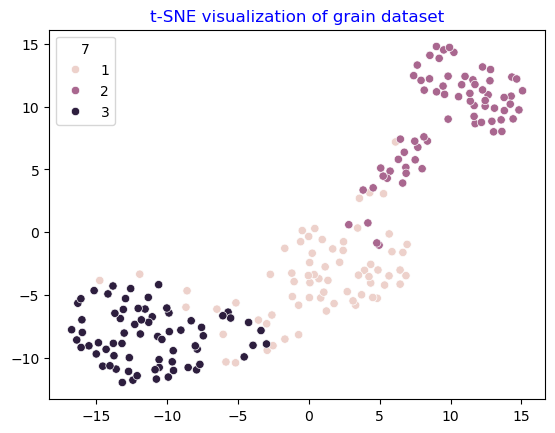

In [56]:
# with seaborn
sns.scatterplot(x=xs, y=ys, data=pd.read_csv(data_folder + "seeds.csv", header=None), hue=7) # column "7"
plt.title("t-SNE visualization of grain dataset", color='blue')
plt.show()

Exercício 12

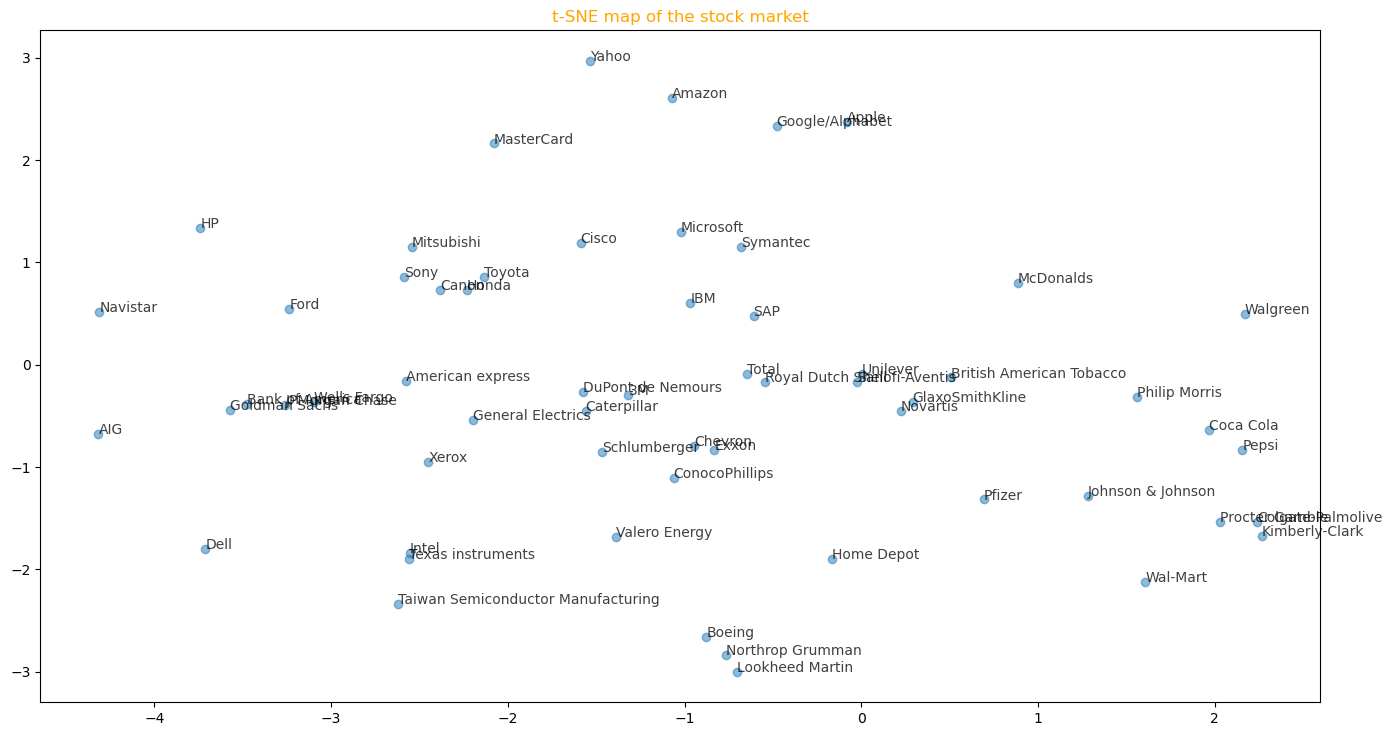

In [58]:
# A t-SNE map of the stock market

# A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market.

# stocks data

# ---> SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function 
#      from sklearn.preprocessing instead of Normalizer. (from sklearn.preprocessing import normalize)

from sklearn.preprocessing import normalize
movements = np.array(pd.read_csv(data_folder + "company-stock-movements-2010-2015-incl.csv", index_col=0))
normalized_movements = normalize(movements)

companies = list(pd.read_csv(data_folder + "company-stock-movements-2010-2015-incl.csv", index_col=0).index)

###################################################

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:, 0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)

plt.title("t-SNE map of the stock market", color='orange')
plt.subplots_adjust(left=0, bottom=-0.4, right=2, top=1, wspace=0, hspace=0)
plt.show()


# Chapter 3 - Decorrelating your data and dimension reduction

#### Exercício 1 - Visualizing the PCA tranformation

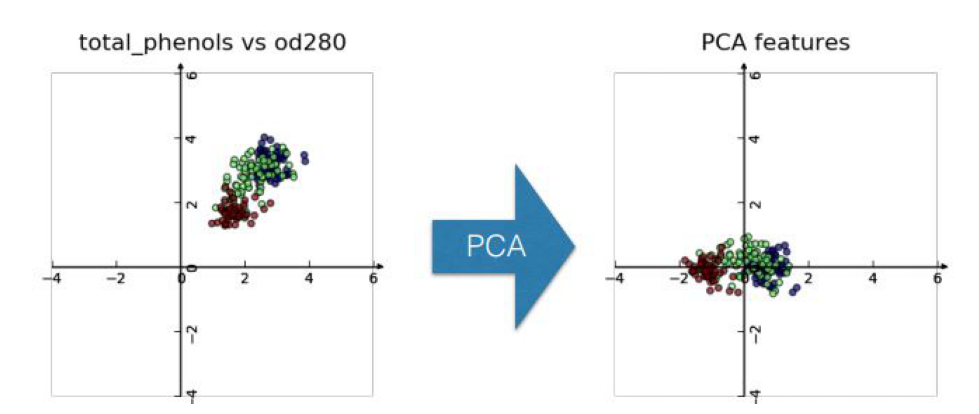

Principal components: 
[[ 0.64116665  0.76740167]
 [ 0.76740167 -0.64116665]]


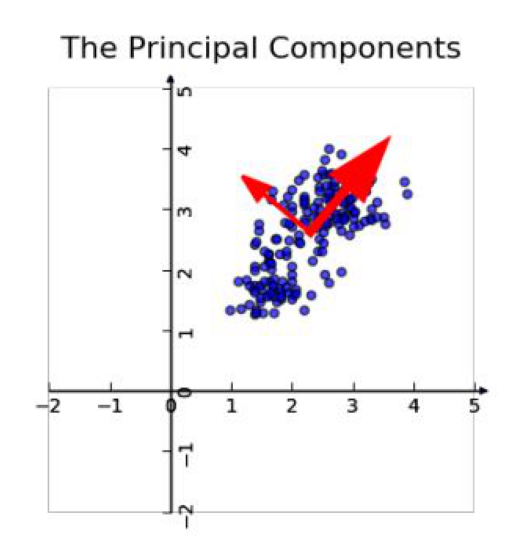

In [61]:
#vídeo

# Dimension reduction
# ● More efficient storage and computation
# ● Remove less-informative "noise" features
# ● ... which cause problems for prediction tasks, e.g. classification, regression

# Principal Component Analysis
# ● PCA = "Principal Component Analysis"
# ● Fundamental dimension reduction technique
# ● First step "decorrelation" (considered here)
# ● Second step reduces dimension (considered later)

# PCA aligns data with axes
# ● Rotates data samples to be aligned with axes
# ● Shifts data samples so they have mean 0
# ● No information is lost

imagem = plt.imread(data_folder + "PCA_aligns_data_axes.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.5, right=1.5, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# PCA follows the fit/transform pattern
# ● PCA a scikit-learn component like KMeans or StandardScaler
# ● fit() learns the transformation from given data
# ● transform() applies the learned transformation
# ● transform() can also be applied to new data

######################################################

# Using scikit-learn PCA

# ● samples = array of two wine features (total_phenols & od280)
df_wine = pd.read_csv(data_folder + "wine.csv").drop(['class_label', 'class_name'], axis=1)
samples = np.array(df_wine.copy()[['total_phenols', 'od280']])  # 2 variables only

from sklearn.decomposition import PCA

model = PCA()

model.fit(samples)

PCA(copy=True)

transformed = model.transform(samples)
transformed  # ver

# PCA features
# ● Rows of transformed correspond to samples
# ● Columns of transformed are the "PCA features"
# ● Row gives PCA feature values of corresponding sample

# PCA features are not correlated
# ● Features of dataset are often correlated (e.g. total_phenols and od280)
# ● PCA aligns the data with axes
# ● Resulting PCA features are not linearly correlated ("decorrelation")

# Pearson correlation
# ● Measures linear correlation of features; Value between -1 and 1; Value of 0 means no linear correlation.

# Principal components
# ● "Principal components" = directions of variance
#   ● PCA aligns principal components with the axes
#   ● Available as components_ attribute of PCA object
#   ● Each row defines displacement from mean

print("Principal components: \n{}".format(model.components_))

imagem = plt.imread(data_folder + "the_principal_components.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()


Exercício 2

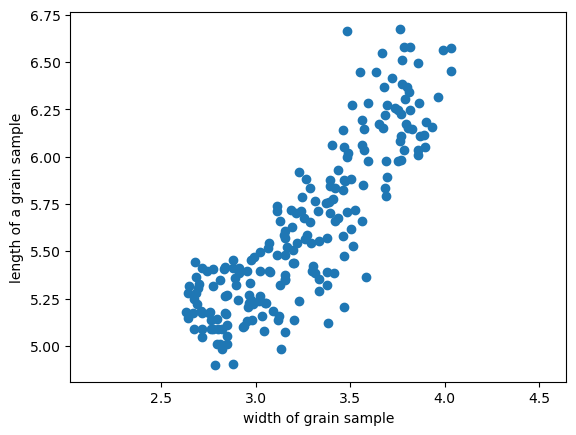

Pearson correlation coefficient: 0.860414937714346


In [63]:
# Correlated data in nature

# grains giving the width and length of samples of grain. You suspect that width and length will be correlated. 
grains = np.array(pd.read_csv(data_folder + "seeds.csv", header=None, index_col=-1)[[4, 3]])

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:, 0]

# Assign the 1st column of grains: length
length = grains[:, 1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.xlabel("width of grain sample")
plt.ylabel("length of a grain sample")
plt.show()

# Calculate the Pearson correlation coefficient
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print("Pearson correlation coefficient: {}".format(correlation))


Exercício 3

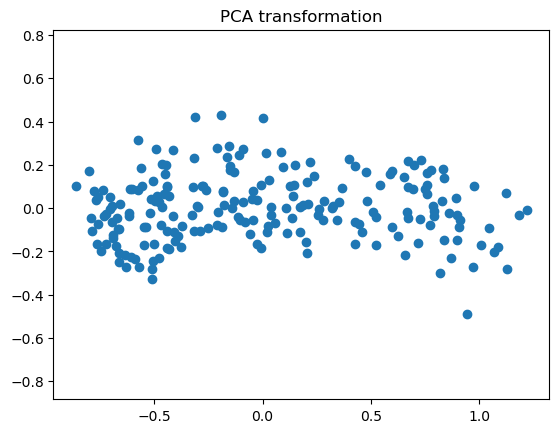

Pearson correlation coefficient: -5.349273947971154e-15


In [65]:
# Decorrelating the grain measurements with PCA

# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.title("PCA transformation")
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print("Pearson correlation coefficient: {}".format(correlation))


Exercício 4

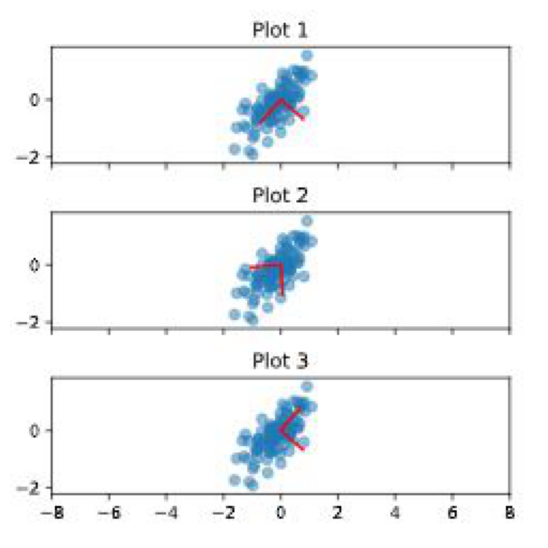

Both plot 1 and 3.


In [67]:
# Principal components

# Below are three scatter plots of the same point cloud. Each scatter plot shows a different set of axes (in red). 
# ---> In which of the plots could the axes represent the principal components of the point cloud?

# Recall that the principal components are the directions along which the the data varies.

imagem = plt.imread(data_folder + "pc_scatter.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

print("Both plot 1 and 3.")

#### Exercício 5 - Intrinsic dimension

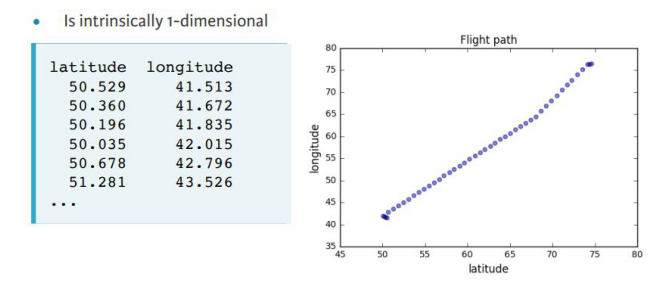

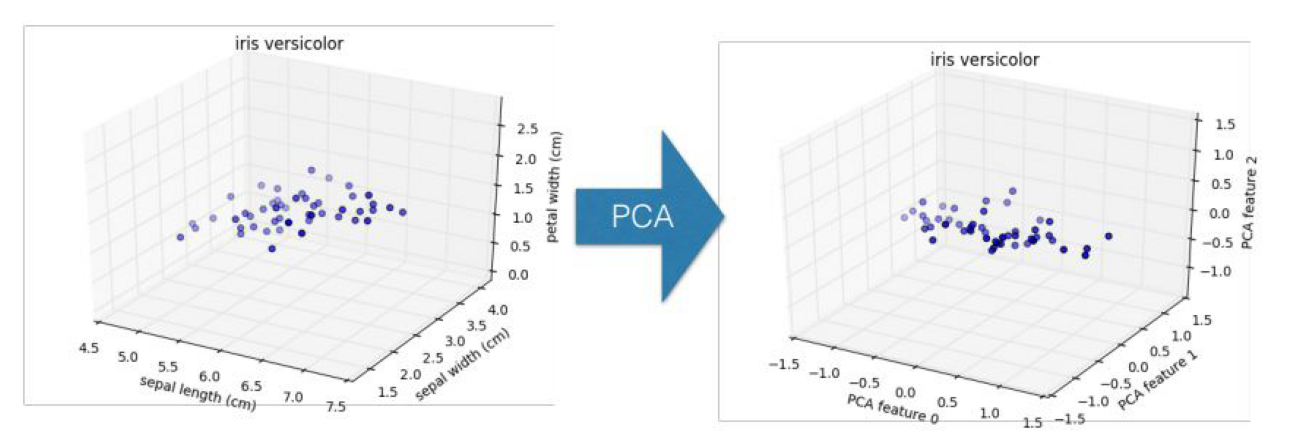

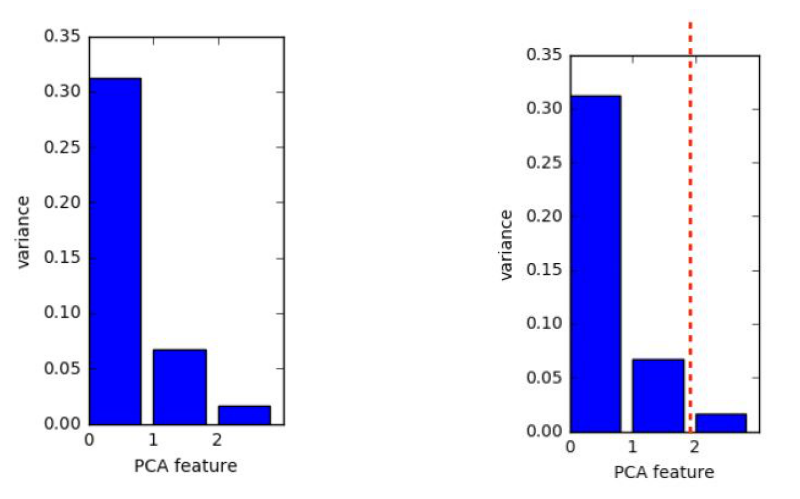

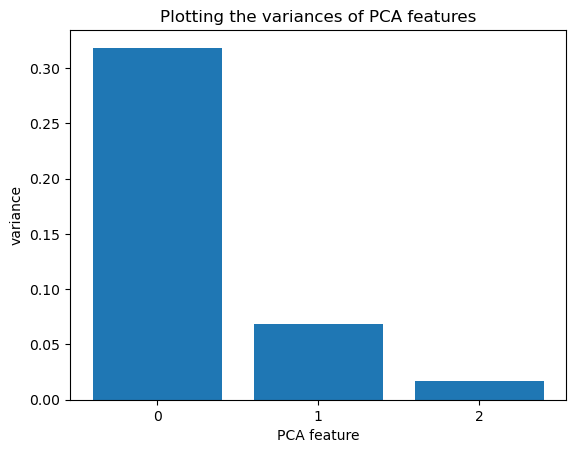

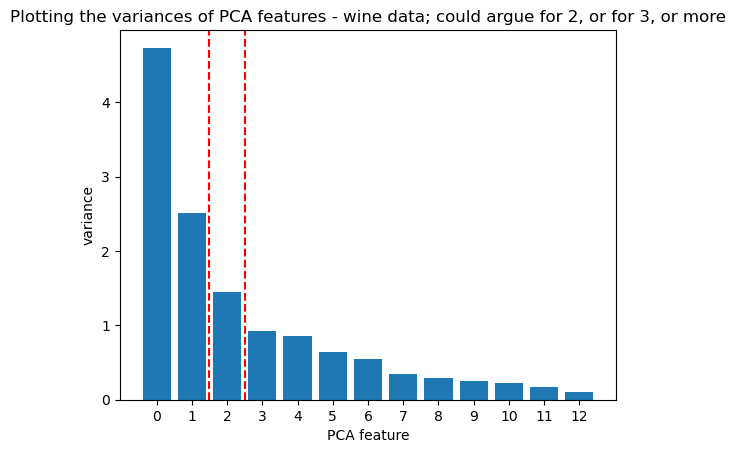

In [69]:
#vídeo

# Intrinsic dimension of a flight path
# ● 2 features: longitude and latitude at points along a flight path
# ● Dataset appears to be 2-dimensional
# ● But can approximate using one feature: displacement along flight path
# ● Is intrinsically 1-dimensional

imagem = plt.imread(data_folder + "intrinsic_dimension_one.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# Intrinsic dimension
# ● Intrinsic dimension = number of features needed to approximate the dataset
# ● Essential idea behind dimension reduction:
# ● What is the most compact representation of the samples?
# ● Can be detected with PCA

####################################

# Versicolor dataset
# ● "versicolor" (one of the iris species)
# ● Only 3 features: sepal length, sepal width, and petal width
# ● Samples are points in 3D space.

# Versicolor dataset has intrinsic dimension 2
# ● Samples lie close to a flat 2-dimensional sheet
# ● So can be approximated using 2 features

#########################################################

# PCA identifies intrinsic dimension
# ● Scatter plots work only if samples have 2 or 3 features
# ● PCA identifies intrinsic dimension when samples have any number of features
# ● Intrinsic dimension = number of PCA features with significant variance

# PCA of the versicolor samples
imagem = plt.imread(data_folder + "pca_versicolor.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.1, right=2, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

###########################################

# Variance and intrinsic dimension

# PCA features are ordered by variance descending
plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "variance_descending.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.1, right=2, top=1, wspace=0, hspace=0)
plt.imshow(imagem)

# ● Intrinsic dimension is number of PCA features with significant variance
# ● In our example: the first two PCA features
# ● So intrinsic dimension is 2

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "variance_descending_2.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

print("======================================================================")
########################################################

# Plotting the variances of PCA features

# ● samples = array of versicolor samples
iris = load_iris()
samples = iris.data[50:100, [0, 1, 3]]   # 50:100 (versicolor) ;[[0, 1, 3]] (sepal length, sepal width, petal width)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(samples)
PCA(copy=True)
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.title("Plotting the variances of PCA features")
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

###########################################################################################
print("======================================================================")

# Intrinsic dimension can be ambiguous
# ● Intrinsic dimension is an idealization
# ● … there is not always one correct answer!
#   --> example, Piedmont wines: could argue for 2, or for 3, or more

df_wine = pd.read_csv(data_folder + "wine.csv").drop(['class_label', 'class_name'], axis=1)
samples = df_wine.copy()

# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
samples_scaled = np.array(pd.DataFrame(scaler.fit_transform(samples.astype(float)), columns=samples.columns))

# plot the variance of the PCA features
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(samples_scaled)
PCA(copy=True)
features_wine = range(pca.n_components_)

plt.bar(features_wine, pca.explained_variance_)
plt.xticks(features_wine)
plt.title("Plotting the variances of PCA features - wine data; could argue for 2, or for 3, or more")
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.axvline(x=1.5, c='red', linestyle='--')
plt.axvline(x=2.5, c='red', linestyle='--')
plt.show()


Exercício 6

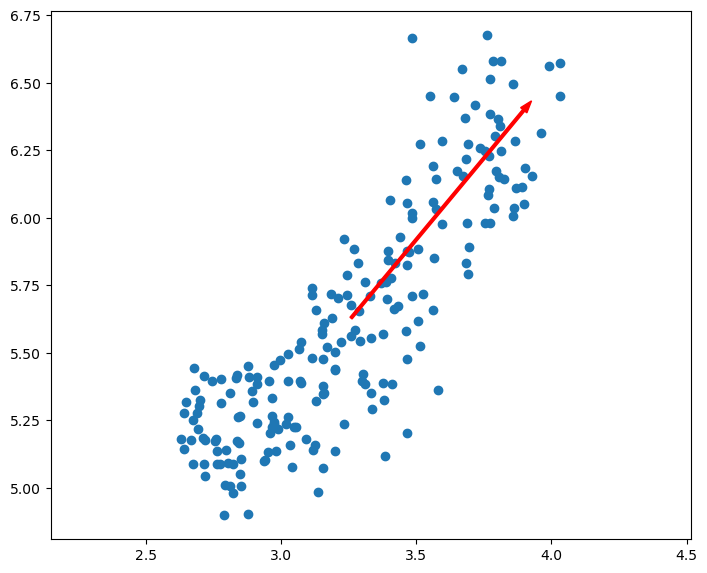

This is the direction in which the grain data varies the most.


In [71]:
# The first principal component

# The first principal component of the data is the direction in which the data varies the most.
# In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of 
# the grain samples, and represent it as an arrow on the scatter plot.

# grains: width and length of samples of grain
grains = np.array(pd.read_csv(data_folder + "seeds.csv", header=None, index_col=-1)[[4, 3]])

############################################################## (no normalization necessary)

# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
from sklearn.decomposition import PCA

model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.subplots_adjust(left=0, bottom=-0.1, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("This is the direction in which the grain data varies the most.")

Exercício 7

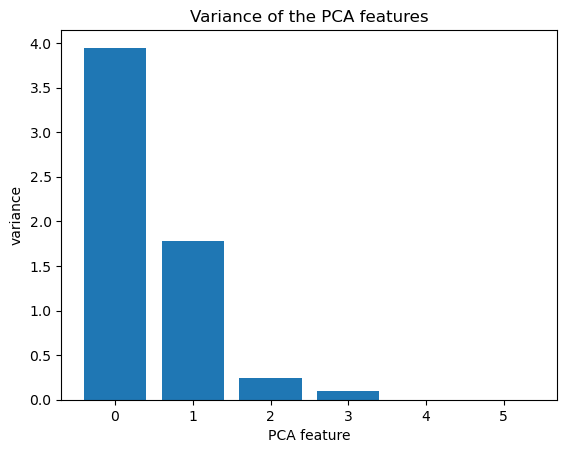

It looks like PCA features 0 and 1 have significant variance.


In [73]:
# Variance of the PCA features

# The fish dataset is 6-dimensional. But what is its intrinsic dimension? 
# Make a plot of the variances of the PCA features to find out. 
# As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

samples = np.array(pd.read_csv(data_folder + "fish.csv", header=None).drop(0, axis=1))

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.title("Variance of the PCA features")
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
# plt.axvline(x=1.5, c='red', linestyle='--')
plt.show()

print("It looks like PCA features 0 and 1 have significant variance.")

Exercício 8

In [75]:
# Intrinsic dimension of the fish data

# Looking again at your plot, what do you think would be a reasonable choice for the "intrinsic dimension" of the the fish
# measurements? 

print("2")

2


#### Exercício 9 - Dimension reduction with PCA

(150, 2)


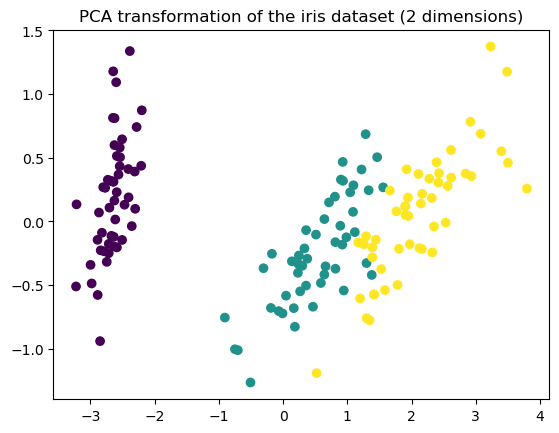

In [77]:
#vídeo

# Dimension reduction
# ● Represents same data, using less features
# ● Important part of machine-learning pipelines
# ● Can be performed using PCA

# Dimension reduction with PCA
# ● PCA features are in decreasing order of variance
# ● Assumes the low variance features are "noise"
# ● … and high variance features are informative

# Dimension reduction with PCA
# ● Specify how many features to keep
# ● E.g. PCA(n_components=2)
# ● Keeps the first 2 PCA features
# ● Intrinsic dimension is a good choice

#################################################################

# Dimension reduction of iris dataset
iris = load_iris()
# ● samples = array of iris measurements (4 features)
# ● species = list of iris species numbers
samples = iris.data.copy()
species = iris.target.copy()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(samples)
PCA(copy=True)

transformed = pca.transform(samples)
print(transformed.shape)

# Iris dataset in 2 dimensions
# ● PCA has reduced the dimension to 2
# ● Retained the 2 PCA features with highest variance
# ● Important information preserved: species remain distinct

import matplotlib.pyplot as plt

xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs, ys, c=species)
plt.title("PCA transformation of the iris dataset (2 dimensions)")
plt.show()

# Dimension reduction with PCA
# ● Discards low variance PCA features
#  ---> Assumes the high variance features are informative
# ● Assumption typically holds in practice (e.g. for iris)

print("=================================================================")

In [78]:
%%script false --no-raise-error
###################################################################

# Word frequency arrays
# ● Rows represent documents, columns represent words
# ● Entries measure presence of each word in each document
# ● ... measure using "tf-idf" (more later)

# Sparse arrays and csr_matrix
# ● Array is "sparse": most entries are zero
# ● Can use -- 'scipy.sparse.csr_matrix' -- instead of NumPy array
# ● csr_matrix remembers only the non-zero entries (saves space!)

# TruncatedSVD and csr_matrix
#  ● scikit-learn PCA doesn't support csr_matrix
#  ● Use scikit-learn TruncatedSVD instead
#  ● Performs same transformation

from sklearn.decomposition import TruncatedSVD

model = TruncatedSVD(n_components=3)
model.fit(documents) # documents is csr_matrix

TruncatedSVD(algorithm='randomized')
transformed = model.transform(documents)

Exercício 10

In [80]:
# fish data
print(pd.read_csv(data_folder + "fish.csv", header=None)[0].value_counts())
pd.read_csv(data_folder + "fish.csv", header=None).head()

0
Bream    34
Roach    20
Pike     17
Smelt    14
Name: count, dtype: int64


,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


(85, 2)


/var/folders/36/syp262nj0bq8s2vgsyhjkc4w0000gn/T/ipykernel_26010/2847261974.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  species = list(pd.read_csv(data_folder + "fish.csv", header=None).replace(


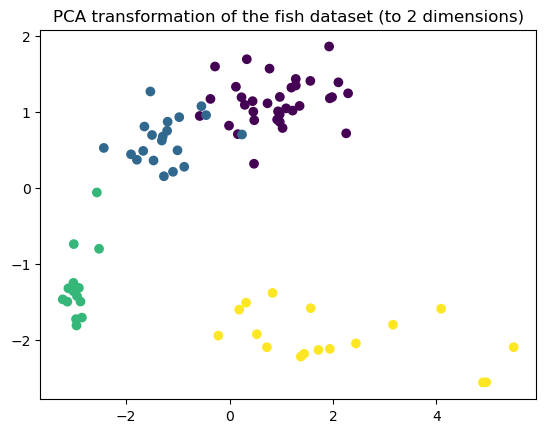

In [81]:
# Dimension reduction of the fish measurements

# In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements.
# Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.
# --> need to scale the samples

samples = np.array(pd.read_csv(data_folder + "fish.csv", header=None).drop(0, axis=1))

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA(n_components=2)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the PCA instance (after scaled) to the scaled samples
pipeline.fit(samples)

# Transform the scaled samples: pca_features
pca_features = pipeline.transform(samples)

# Print the shape of pca_features
print(pca_features.shape)

# The dimensionality was reduced from 6 to 2

################################################
#meu

xs = pca_features[:,0]
ys = pca_features[:,1]

species = list(pd.read_csv(data_folder + "fish.csv", header=None).replace(
    ["Bream", "Roach", "Smelt", "Pike"], [0, 1, 2, 3])[0])

plt.scatter(xs, ys, c=species)
plt.title("PCA transformation of the fish dataset (to 2 dimensions)")
plt.show()


(85, 2)


/var/folders/36/syp262nj0bq8s2vgsyhjkc4w0000gn/T/ipykernel_26010/1605307804.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  species = list(pd.read_csv(data_folder + "fish.csv", header=None).replace(


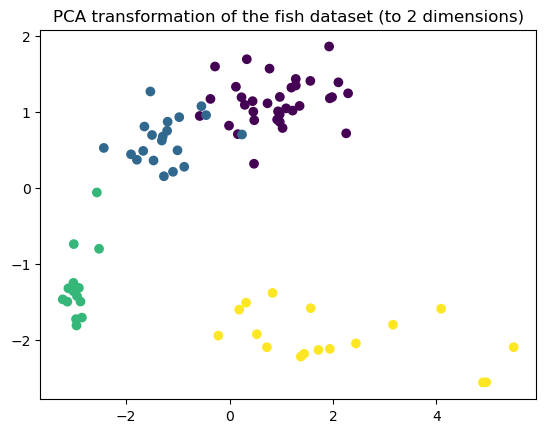

number of PCA features to begin with


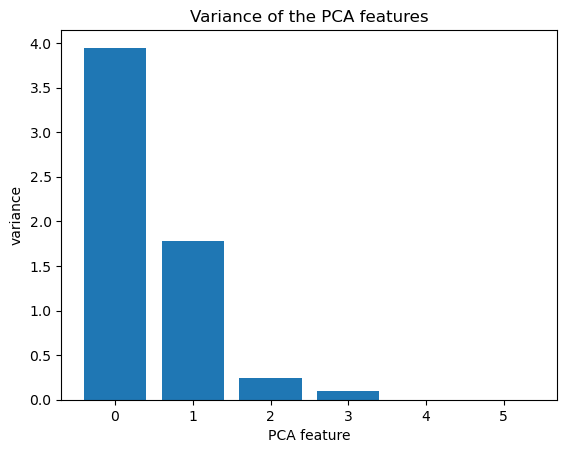

In [82]:
#solução do exercício (já tinham scaled_samples):
samples = pd.read_csv(data_folder + "fish.csv", header=None).drop(0, axis=1)
scaler = StandardScaler()
scaled_samples = np.array(pd.DataFrame(scaler.fit_transform(samples.astype(float)), columns=samples.columns))

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(scaled_samples)

pca_features = pca.transform(scaled_samples)

print(pca_features.shape)  # (85, 2)

#####################################################

xs = pca_features[:,0]
ys = pca_features[:,1]

species = list(pd.read_csv(data_folder + "fish.csv", header=None).replace(
    ["Bream", "Roach", "Smelt", "Pike"], [0, 1, 2, 3])[0])

plt.scatter(xs, ys, c=species)
plt.title("PCA transformation of the fish dataset (to 2 dimensions)")
plt.show()

############################################

print("=============================================================")
print("number of PCA features to begin with")
# Plot the explained variances

pca = PCA()
pca.fit(scaled_samples)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.title("Variance of the PCA features")
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
# plt.axvline(x=1.5, c='red', linestyle='--')
plt.show()

Exercício 11

In [84]:
# A tf-idf word-frequency array

# In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. 
# For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it
# outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)     # This is a word-frequency array in csr_matrix format.

# Print result of toarray() method
print(csr_mat.toarray(), "\n")

# Get the words: words
words = tfidf.get_feature_names_out()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]] 

['cats' 'chase' 'dogs' 'meow' 'say' 'woof']


Exercício 12

In [86]:
# Clustering Wikipedia part I

# You saw in the video that TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as 
# word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. 
# In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia 
# articles.

# Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency
# matrix for you, so there's no need for a TfidfVectorizer).


# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)


Exercício 13

In [88]:
%%script false --no-raise-error
# Clustering Wikipedia part II

from sklearn.feature_extraction.text import TfidfVectorizer

titles = list(pd.read_csv(data_folder + "wikipedia-vectors.csv", index_col=0).columns)
# tfidf = TfidfVectorizer() 
# articles = tfidf.fit_transform(articles_original)     # --> This is a word-frequency array in csr_matrix format
articles_toarray = np.array(pd.read_csv(data_folder + "wikipedia-vectors.csv", index_col=0))

######################################

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


# Chapter 4 - Discovering interpretable features

#### Exercício 1 - Non-negative matrix factorization (NMF)

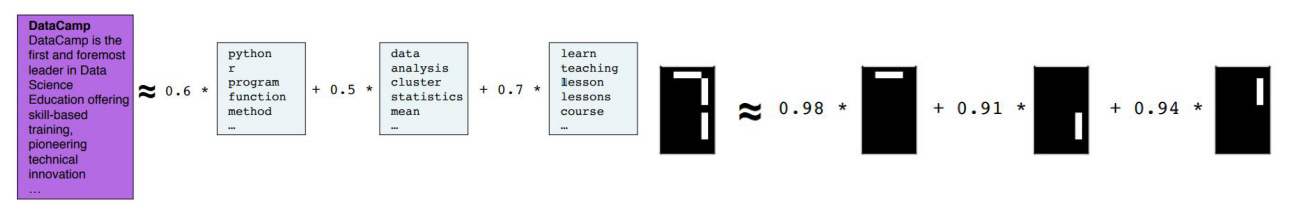

NMF features:
 [[5.10368218e-01 7.66024956e-05]
 [5.10469814e-01 0.00000000e+00]
 [0.00000000e+00 8.82373201e-01]]

NMF components: 
 [[5.07156785e-01 0.00000000e+00 5.07299482e-01 6.66929994e-01
  1.01457760e+00 6.67117617e-01]
 [5.86925227e-01 7.71689974e-01 5.86855023e-01 4.61618718e-05
  9.87338634e-09 0.00000000e+00]]


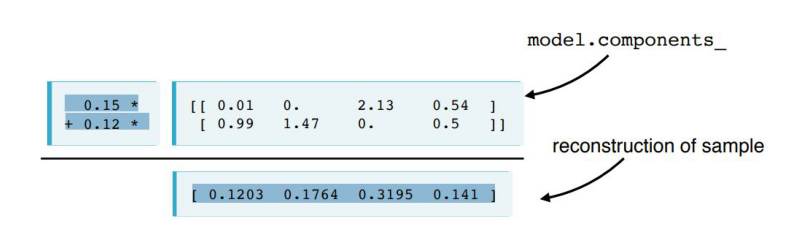

In [91]:
#vídeo

# Non-negative matrix factorization
# ● NMF = "non-negative matrix factorization"
# ● Dimension reduction technique
# ● NMF models are interpretable (unlike PCA)
# ● Easy to interpret means easy to explain!
# ● However, all sample features must be non-negative (>= 0)

# Interpretable parts
# ● NMF expresses documents as combinations of common topics (or "themes")

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "NMF_1.JPG")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.1, right=2, top=1, wspace=0, hspace=0)
plt.imshow(imagem)

# ● NMF expresses images as combinations of common patterns

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "NMF_2.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-1, right=2, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()


# Using scikit-learn NMF
# ● Follows fit() / transform() pattern
# ● Must specify number of components e.g. NMF(n_components=2)
# ● Works with NumPy arrays and with csr_matrix

########################################################

# Example word-frequency array
# ● Word frequency array, 4 words, many documents
# ● Measure presence of words in each document using "tf-idf"
# ● "tf" = frequency of word in document
# ● "idf" reduces influence of frequent words

# Example usage of NMF
# ● samples is the word-frequency array
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer() 
csr_mat = tfidf.fit_transform(documents)  # word-frequency array
samples = csr_mat.copy()

from sklearn.decomposition import NMF

model = NMF(n_components=2)  # always specify the 'n_components' in NMF

model.fit(samples)

NMF(alpha_W=0.0)

nmf_features = model.transform(samples)
print("NMF features:\n {}".format(nmf_features))


# --> NMF components
# ● NMF has components
# ● ... just like PCA has principal components
# ● Dimension of components = dimension of samples
# ● Entries are non-negative
print("\nNMF components: \n {}".format(model.components_))

# --> NMF features
# ● NMF feature values are non-negative
# ● Can be used to reconstruct the samples
# ● ... combine feature values with components

###################################

# print(samples[i,:])
# print(nmf_features[i,:]) 

imagem = plt.imread(data_folder + "reconstruction_sample.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.3, right=1.2, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# Sample reconstruction
# ● Multiply components by feature values, and add up
# ● Can also be expressed as a product of matrices
# ● This is the "Matrix Factorization" in "NMF"

# NMF fits to non-negative data, only
# ● Word frequencies in each document
# ● Images encoded as arrays
# ● Audio spectrograms
# ● Purchase histories on e-commerce sites
# ● … and many more!


Exercício 2

In [93]:
# Non-negative data
# Which of the following 2-dimensional arrays are examples of non-negative data?

# 1) A tf-idf word-frequency array.
# 2) An array daily stock market price movements (up and down), where each row represents a company.
# 3) An array where rows are customers, columns are products and entries are 0 or 1, indicating whether a customer has 
#    purchased a product.

print("1 and 3")

1 and 3


Exercício 3

In [95]:
# NMF applied to Wikipedia articles

articles_0 = open(data_folder + "wikipedia-vocabulary-utf8.txt")#.read()

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer() 
articles = tfidf.fit_transform(articles_0)

######################################

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print("NMF features:\n {}".format(nmf_features.round(2)))


# These NMF features don't make much sense at this point, but you will explore them in the next exercise

NMF features:
 [[0.   0.   0.   0.   0.   0.01]
 [0.   0.01 0.   0.   0.   0.  ]
 [0.   0.   0.   0.01 0.   0.  ]
 ...
 [0.   0.   0.05 0.   0.   0.  ]
 [0.   0.   0.   0.   0.03 0.  ]
 [0.   0.   0.   0.   0.   0.03]]


In [96]:
# solução do exercício (com o artigo deles)
nmf_features = np.array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 4.40515071e-01], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 5.66668836e-01], [3.82062094e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 3.98691382e-01], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 3.81782821e-01], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 4.85572208e-01],  [1.29290955e-02, 1.37890618e-02, 7.76265003e-03, 3.34494297e-02,    0.00000000e+00, 3.34559546e-01], [0.00000000e+00, 0.00000000e+00, 2.06725834e-02, 0.00000000e+00,   6.04485645e-03, 3.59101549e-01], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 4.91032404e-01],  [1.54275040e-02, 1.42818986e-02, 3.76605375e-03, 2.37116224e-02,    2.62619707e-02, 4.80828546e-01], [1.11738666e-02, 3.13680308e-02, 3.09460771e-02, 6.57013035e-02,    1.96677488e-02, 3.38326782e-01], [0.00000000e+00, 0.00000000e+00, 5.30676485e-01, 0.00000000e+00,    2.83679175e-02, 0.00000000e+00],  [0.00000000e+00, 0.00000000e+00, 3.56480495e-01, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [1.20127818e-02, 6.50041175e-03, 3.12219985e-01, 6.09781894e-02,   1.13861340e-02, 1.92623695e-02], [3.93487811e-03, 6.24439628e-03, 3.42345567e-01, 1.10770989e-02,   0.00000000e+00, 0.00000000e+00],  [4.63823724e-03, 0.00000000e+00, 4.34879840e-01, 0.00000000e+00,    3.84274425e-02, 3.08168020e-03], [0.00000000e+00, 0.00000000e+00, 4.83250048e-01, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [5.65019375e-03, 1.83534616e-02, 3.76502535e-01, 3.25466928e-02,   0.00000000e+00, 1.13347258e-02], [0.00000000e+00, 0.00000000e+00, 4.80874892e-01, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 9.01860065e-03, 5.50963386e-01, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 4.65931970e-01, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 1.14080125e-02, 2.08638633e-02, 5.17776605e-01,    5.81407063e-02, 1.37868832e-02],  [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.10484405e-01,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 5.60100322e-03, 0.00000000e+00, 4.22387415e-01,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.36759063e-01,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.98100948e-01,    0.00000000e+00, 0.00000000e+00], [9.88398904e-02, 8.60039449e-02, 3.91003776e-03, 3.81024387e-01,    4.39249116e-04, 5.22208164e-03], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.72180141e-01,   0.00000000e+00, 7.13617972e-03], [1.31469196e-02, 1.04852718e-02, 0.00000000e+00, 4.68914461e-01,    0.00000000e+00, 1.16322875e-02], [3.84548122e-03, 0.00000000e+00, 0.00000000e+00, 5.75720876e-01,    0.00000000e+00, 0.00000000e+00], [2.25242688e-03, 1.38734354e-03, 0.00000000e+00, 5.27955255e-01,    1.20264538e-02, 1.49500286e-02], [0.00000000e+00, 4.07545848e-01, 1.85699715e-03, 0.00000000e+00,    2.96609629e-03, 4.52399971e-04], [1.53422119e-03, 6.08169557e-01, 5.22237114e-04, 6.24865265e-03,    1.18444416e-03, 4.40131787e-04], [5.38821892e-03, 2.65015531e-01, 5.38465679e-04, 1.86929393e-02,    6.38650329e-03, 2.90137624e-03], [0.00000000e+00, 6.44912216e-01, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 6.08903492e-01, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 3.43683288e-01, 0.00000000e+00, 0.00000000e+00,    3.97793691e-03, 0.00000000e+00], [6.10512186e-03, 3.15311017e-01, 1.54867500e-02, 0.00000000e+00,    5.06243238e-03, 4.74389645e-03], [6.47375690e-03, 2.13327326e-01, 9.49418440e-03, 4.56989540e-02,    1.71914192e-02, 9.52170473e-03], [7.99151301e-03, 4.67592490e-01, 0.00000000e+00, 2.43429871e-02,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 6.42816435e-01, 0.00000000e+00, 2.35860504e-03,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    4.77078335e-01, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    4.94251192e-01, 0.00000000e+00], [0.00000000e+00, 2.99048428e-04, 2.14465120e-03, 0.00000000e+00,    3.81775361e-01, 5.83839506e-03], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.64697074e-03,    5.42236564e-01, 0.00000000e+00], [1.78059076e-03, 7.84401182e-04, 1.41616013e-02, 4.59796180e-04,    4.24298591e-01, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    5.11386792e-01, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 3.28354299e-03, 0.00000000e+00,    3.72883613e-01, 0.00000000e+00], [0.00000000e+00, 2.62078520e-04, 3.61074812e-02, 2.32329472e-04,    2.30508662e-01, 0.00000000e+00], [1.12518076e-02, 2.12325836e-03, 1.60958985e-02, 1.02486372e-02,    3.25458840e-01, 3.75921970e-02], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    4.18954526e-01, 3.57696678e-04], [3.08375076e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [3.68183504e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [3.97955280e-01, 2.81701511e-02, 3.66982960e-03, 1.70070091e-02,    1.95966120e-03, 2.11668471e-02], [3.75804447e-01, 2.07519798e-03, 0.00000000e+00, 3.72161218e-02,    0.00000000e+00, 5.85994434e-03], [4.38039688e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [4.57893024e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [2.75484436e-01, 4.46954317e-03, 0.00000000e+00, 5.29665235e-02,    0.00000000e+00, 1.91019250e-02], [4.45205598e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    5.48694373e-03, 0.00000000e+00], [2.92748058e-01, 1.33664061e-02, 1.14254082e-02, 1.05201915e-02,    1.87694779e-01, 9.24068825e-03], [3.78276389e-01, 1.43969443e-02, 0.00000000e+00, 9.85257387e-02,   1.35899337e-02, 0.00000000e+00]])


Exercício 4

In [98]:
# NMF features of the Wikipedia articles

titles = list(pd.read_csv(data_folder + "wikipedia-vectors.csv", index_col=0).columns)
############################################################

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print("\n", df.loc['Denzel Washington'])

print("""\n Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are 
reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics
(for instance, acting!).""")

0    0.003845
1    0.000000
2    0.000000
3    0.575721
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64

 0    0.000000
1    0.005601
2    0.000000
3    0.422387
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64

 Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are 
reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics
(for instance, acting!).


Exercício 5

In [100]:
# NMF reconstructs samples

# In this exercise, you'll check your understanding of how NMF reconstructs samples from its components using the NMF 
# feature values. Below are the components of an NMF model. If the NMF feature values of a sample are [2, 1], then
# which of the following is most likely to represent the original sample? 

components = [[ 1.,   0.5,  0. ],
              [ 0.2,  0.1,  2.1]]

print("[2.2, 1.0, 2.0]")

[2.2, 1.0, 2.0]


#### Exercício 6 - NMF learns interpretable parts

(13125, 13125)
(10, 13125)


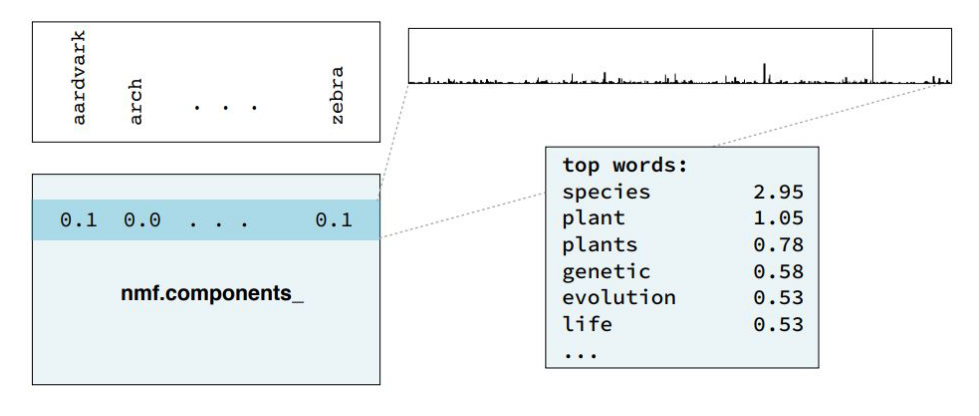

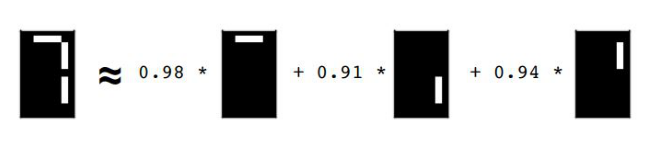

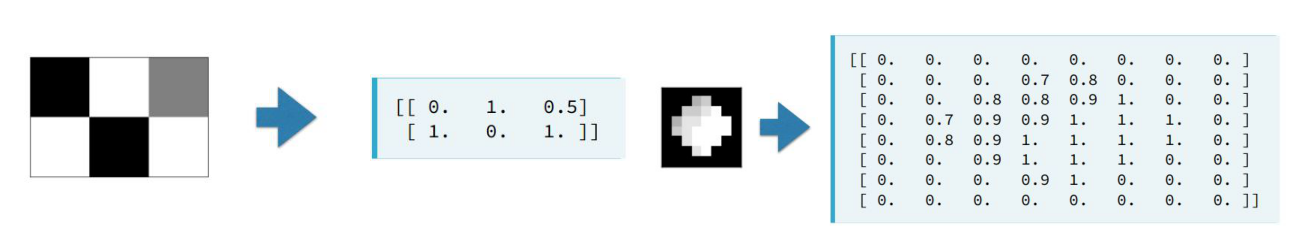

[0.  1.  0.5 1.  0.  1. ] 

[[0.  1.  0.5]
 [1.  0.  1. ]]


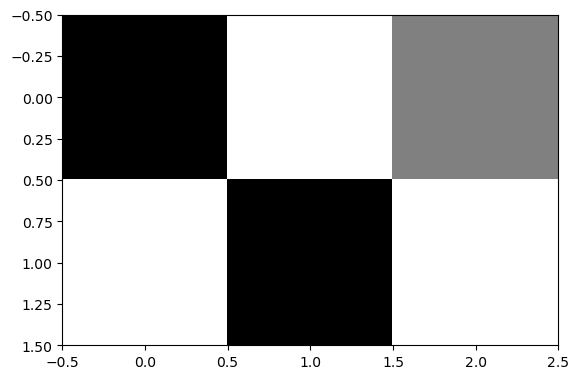

In [102]:
#vídeo

# Example: NMF learns interpretable parts
# ● Word-frequency array articles (tf-idf)
# ● 20,000 scientific articles (rows)
# ● 800 words (columns)
# ---> no 'exemplo' que vou pôr é (13125, 13125)

# Applying NMF to the articles

print(articles.shape)

from sklearn.decomposition import NMF

nmf = NMF(n_components=10)
nmf.fit(articles)
NMF(alpha_W=0.0)

print(nmf.components_.shape)

################################################

# NMF components are topics
imagem = plt.imread(data_folder + "NMF_components.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# NMF components
# ● For documents:
#   - NMF components represent topics
#   - NMF features combine topics into documents.
print("=================================================================================================================")
# ● For images, NMF components are parts of images

imagem = plt.imread(data_folder + "NMF_2.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-1, right=1, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

print("=================================================================================================================")
################################################

# Grayscale images
# ● "Grayscale" image = no colors, only shades of gray
# ● Measure pixel brightness
# ● Represent with value between 0 and 1 (0 is black)
# ● Convert to 2D array

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "grayscale.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.1, right=2, top=1, wspace=0, hspace=0)
plt.imshow(imagem)

# ● An 8x8 grayscale image of the moon, written as an array

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "grayscale_2.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-1, right=2, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# Grayscale images as flat arrays
# ● Enumerate the entries
# ● Row-by-row
# ● From left to right
# (imagem)

# Encoding a collection of images
# ● Collection of images of the same size
# ● Encode as 2D array
# ● Each row corresponds to an image
# ● Each column corresponds to a pixel
# ● ... can apply NMF!
# (imagem)

# Visualizing samples
sample = np.array([0., 1., 0.5, 1., 0., 1. ])
print(sample, "\n")

bitmap = sample.reshape((2, 3))
print(bitmap)

from matplotlib import pyplot as plt

plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.show()


Exercício 7

In [104]:
%%script false --no-raise-error
# NMF learns topics of documents

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())


# Take a moment to recognise the topics that the articles about Anne Hathaway and Denzel Washington have in common:

<script.py> output:
    (6, 13125)
    film       0.627877
    award      0.253131
    starred    0.245284
    role       0.211451
    actress    0.186398
    Name: 3, dtype: float64

Exercício 8

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] 

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]] 



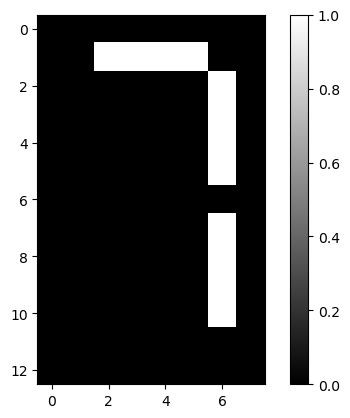

In [106]:
# Explore the LED digits dataset

# You are given 100 images as a 2D array samples, where each row represents a single 13x8 image.
samples = np.array(pd.read_csv(data_folder + "lcd-digits.csv", header=None))

############################################################################

# Select the 0th row: digit
digit = samples[0]

# Print digit
print(digit, "\n")

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13, 8)

# Print bitmap
print(bitmap, "\n")

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


Exercício 9

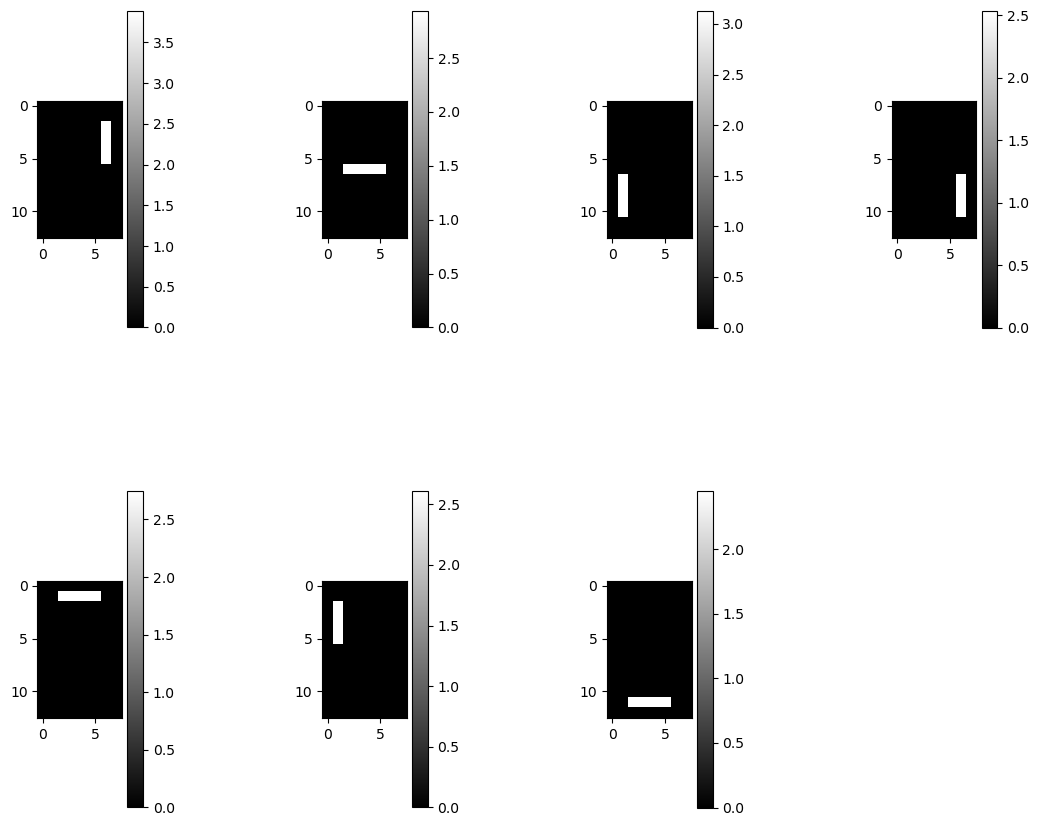

[2.57347960e-01 0.00000000e+00 0.00000000e+00 3.94333376e-01
 3.64045642e-01 0.00000000e+00 3.51281846e-14]


In [108]:
# NMF learns the parts of images

# Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array
# samples. This time, you are also provided with a function show_as_image() that displays the image encoded by any 1D array:

# versão para aparecer uma de cada vez
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()
    
# versão para aparecer depois em subplots
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    
#############################################################

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7) # (7 is the number of cells in an LED display).

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for i, component in enumerate(model.components_):
    plt.subplot(2, 4, i+1)
    show_as_image(component)

# plot
plt.subplots_adjust(left=0, bottom=-1, right=1.5, top=1, wspace=1.7, hspace=0)
plt.show()
    
# Assign the 0th row of features: digit_features
digit_features = features[0]

# Print digit_features
print(digit_features)

# Take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

Exercício 10

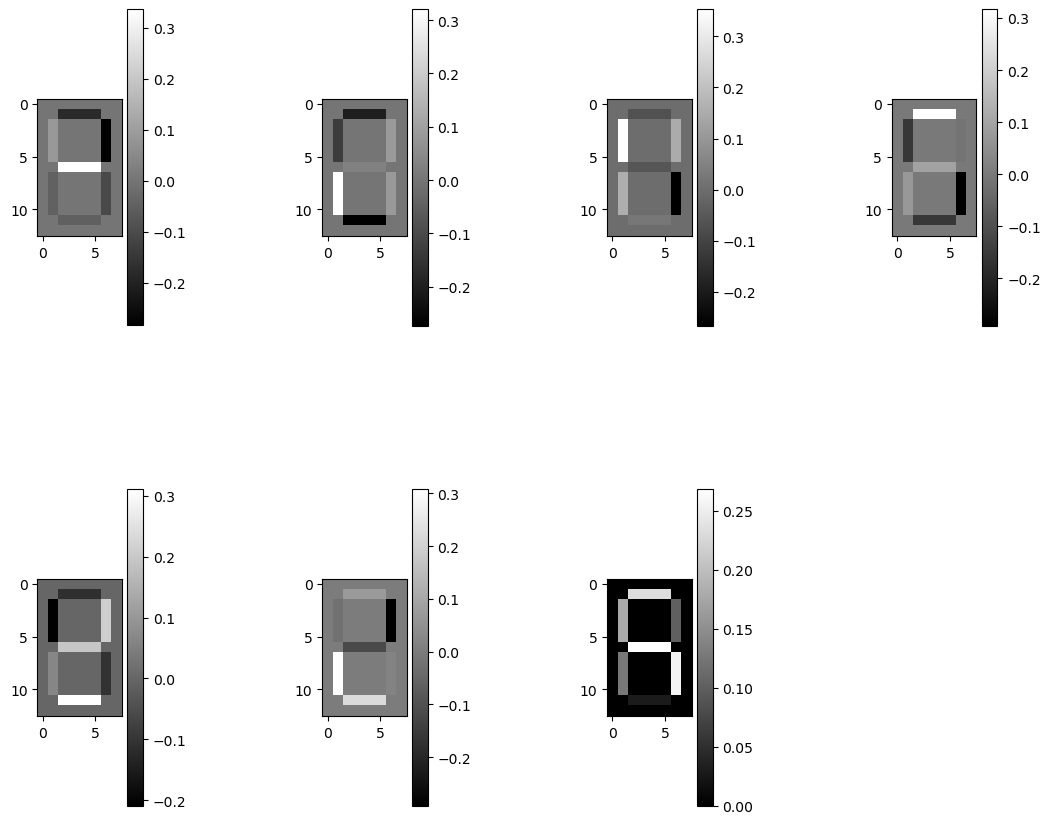

In [110]:
# PCA doesn't learn parts

# Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents)
# or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit
# to the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples. 
# Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

# 100 images as a 2D array samples, where each row represents a single 13x8 image.
samples = np.array(pd.read_csv(data_folder + "lcd-digits.csv", header=None))

############################################################

# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)


# Call show_as_image on each component --> usaram a 'show_as_image' a pintar de vermelho um pixel se < 0
for i, component in enumerate(model.components_):
    plt.subplot(2, 4, i+1)
    show_as_image(component)

plt.subplots_adjust(left=0, bottom=-1, right=1.5, top=1, wspace=1.7, hspace=0)
plt.show()

# Notice that the components of PCA do not represent meaningful parts of images of LED digits!

#### Exercício 11 - Building recommender systems using NMF

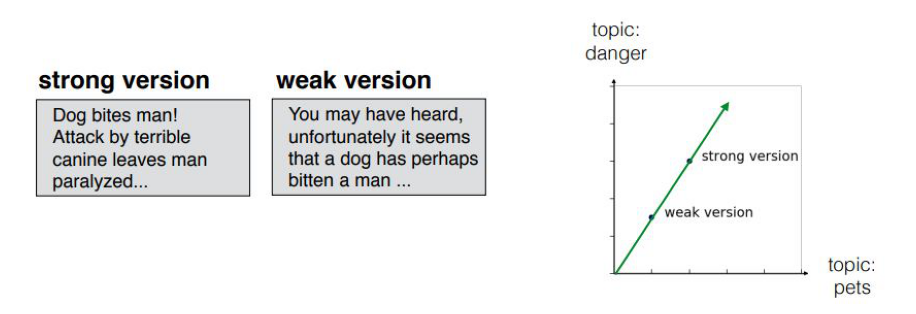

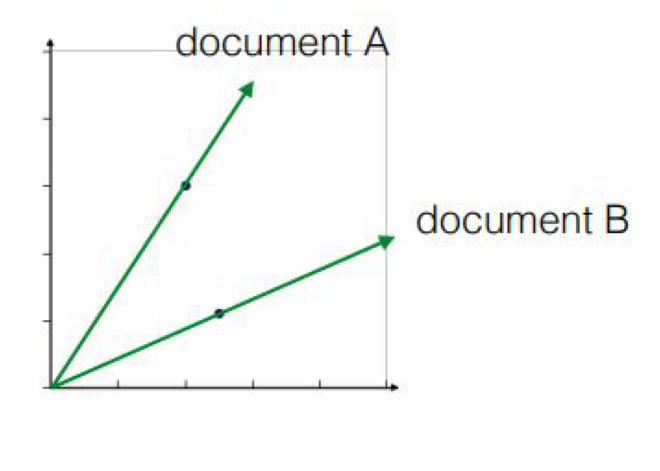

In [112]:
#vídeo

# Finding similar articles
# ● Engineer at a large online newspaper
# ● Task: recommend articles similar to article being read by customer
# ● Similar articles should have similar topics

# Strategy
# -> Apply NMF to the word-frequency array
#   --> NMF feature values describe the topics
# ● ... so similar documents have similar NMF feature values
# ● Compare NMF feature values?

######################################################################

# Apply NMF to the word-frequency array

from sklearn.decomposition import NMF

nmf = NMF(n_components=6)
nmf_features = nmf.fit_transform(articles)

# ---> Versions of articles
# ● Different versions of the same document have same topic proportions
# ● ... exact feature values may be different!
# ● E.g. because one version uses many meaningless words
# --> But all versions lie on the same line through the origin

imagem = plt.imread(data_folder + "topic_proportions.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0.1, right=1.4, top=1, wspace=0, hspace=0)
plt.show()

imagem = plt.imread(data_folder + "cosine_similarity.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# -----> Cosine similarity
# ● Uses the angle between the lines
# ● Higher values means more similar
# ● Maximum value is 1, when angle is 0˚


In [113]:
%%script false --no-raise-error

# Calculating the cosine similarities

from sklearn.preprocessing import normalize

norm_features = normalize(nmf_features)

current_article = norm_features[23,:] # if has index 23

similarities = norm_features.dot(current_article)

print(similarities)

###################################################################################

# DataFrames and labels
# ● Label similarities with the article titles, using a DataFrame
# ● Titles given as a list: titles

norm_features = normalize(nmf_features)

df = pd.DataFrame(norm_features, index=titles)

current_article = df.loc['Dog bites man']

similarities = df.dot(current_article)

# DataFrames and labels
print(similarities.nlargest()) 


Exercício 12

In [115]:
# NMF model for popular Wikipedia articles
nmf_features = np.array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 4.40515071e-01], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 5.66668836e-01], [3.82062094e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 3.98691382e-01], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 3.81782821e-01], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 4.85572208e-01],  [1.29290955e-02, 1.37890618e-02, 7.76265003e-03, 3.34494297e-02,    0.00000000e+00, 3.34559546e-01], [0.00000000e+00, 0.00000000e+00, 2.06725834e-02, 0.00000000e+00,   6.04485645e-03, 3.59101549e-01], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 4.91032404e-01],  [1.54275040e-02, 1.42818986e-02, 3.76605375e-03, 2.37116224e-02,    2.62619707e-02, 4.80828546e-01], [1.11738666e-02, 3.13680308e-02, 3.09460771e-02, 6.57013035e-02,    1.96677488e-02, 3.38326782e-01], [0.00000000e+00, 0.00000000e+00, 5.30676485e-01, 0.00000000e+00,    2.83679175e-02, 0.00000000e+00],  [0.00000000e+00, 0.00000000e+00, 3.56480495e-01, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [1.20127818e-02, 6.50041175e-03, 3.12219985e-01, 6.09781894e-02,   1.13861340e-02, 1.92623695e-02], [3.93487811e-03, 6.24439628e-03, 3.42345567e-01, 1.10770989e-02,   0.00000000e+00, 0.00000000e+00],  [4.63823724e-03, 0.00000000e+00, 4.34879840e-01, 0.00000000e+00,    3.84274425e-02, 3.08168020e-03], [0.00000000e+00, 0.00000000e+00, 4.83250048e-01, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [5.65019375e-03, 1.83534616e-02, 3.76502535e-01, 3.25466928e-02,   0.00000000e+00, 1.13347258e-02], [0.00000000e+00, 0.00000000e+00, 4.80874892e-01, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 9.01860065e-03, 5.50963386e-01, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 4.65931970e-01, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 1.14080125e-02, 2.08638633e-02, 5.17776605e-01,    5.81407063e-02, 1.37868832e-02],  [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.10484405e-01,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 5.60100322e-03, 0.00000000e+00, 4.22387415e-01,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.36759063e-01,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.98100948e-01,    0.00000000e+00, 0.00000000e+00], [9.88398904e-02, 8.60039449e-02, 3.91003776e-03, 3.81024387e-01,    4.39249116e-04, 5.22208164e-03], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.72180141e-01,   0.00000000e+00, 7.13617972e-03], [1.31469196e-02, 1.04852718e-02, 0.00000000e+00, 4.68914461e-01,    0.00000000e+00, 1.16322875e-02], [3.84548122e-03, 0.00000000e+00, 0.00000000e+00, 5.75720876e-01,    0.00000000e+00, 0.00000000e+00], [2.25242688e-03, 1.38734354e-03, 0.00000000e+00, 5.27955255e-01,    1.20264538e-02, 1.49500286e-02], [0.00000000e+00, 4.07545848e-01, 1.85699715e-03, 0.00000000e+00,    2.96609629e-03, 4.52399971e-04], [1.53422119e-03, 6.08169557e-01, 5.22237114e-04, 6.24865265e-03,    1.18444416e-03, 4.40131787e-04], [5.38821892e-03, 2.65015531e-01, 5.38465679e-04, 1.86929393e-02,    6.38650329e-03, 2.90137624e-03], [0.00000000e+00, 6.44912216e-01, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 6.08903492e-01, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 3.43683288e-01, 0.00000000e+00, 0.00000000e+00,    3.97793691e-03, 0.00000000e+00], [6.10512186e-03, 3.15311017e-01, 1.54867500e-02, 0.00000000e+00,    5.06243238e-03, 4.74389645e-03], [6.47375690e-03, 2.13327326e-01, 9.49418440e-03, 4.56989540e-02,    1.71914192e-02, 9.52170473e-03], [7.99151301e-03, 4.67592490e-01, 0.00000000e+00, 2.43429871e-02,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 6.42816435e-01, 0.00000000e+00, 2.35860504e-03,    0.00000000e+00, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    4.77078335e-01, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    4.94251192e-01, 0.00000000e+00], [0.00000000e+00, 2.99048428e-04, 2.14465120e-03, 0.00000000e+00,    3.81775361e-01, 5.83839506e-03], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.64697074e-03,    5.42236564e-01, 0.00000000e+00], [1.78059076e-03, 7.84401182e-04, 1.41616013e-02, 4.59796180e-04,    4.24298591e-01, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    5.11386792e-01, 0.00000000e+00], [0.00000000e+00, 0.00000000e+00, 3.28354299e-03, 0.00000000e+00,    3.72883613e-01, 0.00000000e+00], [0.00000000e+00, 2.62078520e-04, 3.61074812e-02, 2.32329472e-04,    2.30508662e-01, 0.00000000e+00], [1.12518076e-02, 2.12325836e-03, 1.60958985e-02, 1.02486372e-02,    3.25458840e-01, 3.75921970e-02], [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    4.18954526e-01, 3.57696678e-04], [3.08375076e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [3.68183504e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [3.97955280e-01, 2.81701511e-02, 3.66982960e-03, 1.70070091e-02,    1.95966120e-03, 2.11668471e-02], [3.75804447e-01, 2.07519798e-03, 0.00000000e+00, 3.72161218e-02,    0.00000000e+00, 5.85994434e-03], [4.38039688e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [4.57893024e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    0.00000000e+00, 0.00000000e+00], [2.75484436e-01, 4.46954317e-03, 0.00000000e+00, 5.29665235e-02,    0.00000000e+00, 1.91019250e-02], [4.45205598e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,    5.48694373e-03, 0.00000000e+00], [2.92748058e-01, 1.33664061e-02, 1.14254082e-02, 1.05201915e-02,    1.87694779e-01, 9.24068825e-03], [3.78276389e-01, 1.43969443e-02, 0.00000000e+00, 9.85257387e-02,   1.35899337e-02, 0.00000000e+00]])

titles = list(pd.read_csv(data_folder + "wikipedia-vectors.csv", index_col=0).columns)


In [116]:
# Which articles are similar to 'Cristiano Ronaldo'?

# In the video, you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your
# NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer 
# Cristiano Ronaldo. The NMF features you obtained earlier are available as nmf_features, while titles is a list of the 
# article titles.

# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
# Apply the .dot() method of df to article to calculate the cosine similarity of every row with article.
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())


# Evaluate for yourself the quality of the computed similarities!

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


Exercício 13

In [118]:
%%script false --no-raise-error
# Recommend musical artists part I

# In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! 
# You are given a sparse array artists whose rows correspond to artists and whose column correspond to users. 
# The entries give the number of times each artist was listened to by each user.

# In this exercise, build a pipeline and transform the array into normalized NMF features. 

# The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model,
# regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized 
# NMF features for recommendation.

#######################################################################################
# artists_0 = pd.read_csv(data_folder + "artists.csv", header=None)
# artists_1 = [i[0] for i in np.array(artist_0)]
# artists = [[i] for i in artists_1]

# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer() 
# csr_mat = tfidf.fit_transform(artists)     # This is a word-frequency array in csr_matrix format.

###################################################################################

# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


# now that you've computed the normalized NMF features, you'll use them in the next exercise to recommend musical artists!

Exercício 14

In [120]:
%%script false --no-raise-error
# Recommend musical artists part II

# Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? Use your NMF features 
# from the previous exercise and the cosine similarity to find similar musical artists. 

# A solution to the previous exercise has been run, so norm_features is an array containing the normalized NMF features as
# rows. The names of the musical artists are available as the list 'artist_names'.

##########################################################################

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

#####

<script.py> output:
    Bruce Springsteen    1.000000
    Neil Young           0.956627
    Van Morrison         0.873373
    Leonard Cohen        0.864169
    Bob Dylan            0.860414
    dtype: float64


#### Exercício 15 - Final thoughts

In [122]:
#vídeo

# Fim